# **MNIST Digit Recognition 😍❤️**
BY: **MUHAMMAD ZAFRAN**

# **Project Overview**
PROJECT: MNIST Handwritten Digit Recognition
OBJECTIVE: Build ML models to recognize digits 0-9 from images

DATASET: MNIST (70,000 images)
  - 28×28 pixel grayscale images
  - 10 classes (digits 0-9)
  - Real handwritten digits

MODELS TO BUILD:
  1. Logistic Regression (baseline)
  2. Support Vector Machine (traditional ML)
  3. Convolutional Neural Network (deep learning)

EXPECTED OUTCOMES:                                                         
  ✓ Logistic Regression: ~92% accuracy                                  
  ✓ SVM: ~97% accuracy                                            
  ✓ CNN: ~99% accuracy                                            

This notebook will guide you through:                                      
✓ Loading and exploring MNIST dataset                                      
✓ Preprocessing images (normalization, reshaping)                        
✓ Building and training multiple models                                       
✓ Evaluating performance with metrics                                          
✓ Creating professional visualizations                                      
✓ Comparing all models

# **Import Libraries & Setup**

# **Import Libraries & Setup**

In [29]:
# ============================================================================
#  Import Libraries & Setup Environment
# ============================================================================

print("=" * 80)
print(" Importing Libraries...")
print("=" * 80)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             ConfusionMatrixDisplay)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

print("✓ All libraries imported successfully!")

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("✓ Random seeds set for reproducibility!")

# Configure matplotlib for large visualizations
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

print("✓ Environment configured!")

 Importing Libraries...
✓ All libraries imported successfully!
✓ Random seeds set for reproducibility!
✓ Environment configured!


# **What is MNIST?**

MNIST DATASET EXPLAINED:

BASICS:
  - 70,000 handwritten digit images total
  - 60,000 training images
  - 10,000 test images
  - Each image: 28×28 pixels (784 values)
  - Grayscale (0=black, 255=white)
  - Labels: 0, 1, 2, ..., 9 (10 classes)

WHY MNIST?                                           
  - Classic benchmark dataset                                
  - Easy to understand (digits!)                                   
  - Good for learning neural networks
  - Used by researchers for 30+ years

CHALLENGES:                                                       
  - Different handwriting styles
  - Varying stroke widths
  - Some digits ambiguous (7 vs 1, 4 vs 9)
  - Real-world data (not perfect)

PROPERTIES:
  - Balanced: ~6,000 images per digit
  - Centered: Digits in center of image
  - Normalized: Already roughly 28×28

#  **Load MNIST Dataset**

In [30]:
# ============================================================================
#  Load MNIST Dataset
# ============================================================================

print("\n" + "=" * 80)
print(" Loading MNIST Dataset...")
print("=" * 80)

# Load dataset from Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"\n✓ Dataset loaded successfully!")
print(f"\nDataset Shapes:")
print(f"  Training images: {X_train.shape} (60,000 images × 28×28 pixels)")
print(f"  Training labels: {y_train.shape}")
print(f"  Test images: {X_test.shape} (10,000 images × 28×28 pixels)")
print(f"  Test labels: {y_test.shape}")

print(f"\nData Type: {X_train.dtype}")
print(f"Pixel Value Range: {X_train.min()} to {X_train.max()}")

print(f"\nClass Distribution (Training Set):")
unique, counts = np.unique(y_train, return_counts=True)
for digit, count in zip(unique, counts):
    print(f"  Digit {digit}: {count} images ({count/len(y_train)*100:.1f}%)")


 Loading MNIST Dataset...

✓ Dataset loaded successfully!

Dataset Shapes:
  Training images: (60000, 28, 28) (60,000 images × 28×28 pixels)
  Training labels: (60000,)
  Test images: (10000, 28, 28) (10,000 images × 28×28 pixels)
  Test labels: (10000,)

Data Type: uint8
Pixel Value Range: 0 to 255

Class Distribution (Training Set):
  Digit 0: 5923 images (9.9%)
  Digit 1: 6742 images (11.2%)
  Digit 2: 5958 images (9.9%)
  Digit 3: 6131 images (10.2%)
  Digit 4: 5842 images (9.7%)
  Digit 5: 5421 images (9.0%)
  Digit 6: 5918 images (9.9%)
  Digit 7: 6265 images (10.4%)
  Digit 8: 5851 images (9.8%)
  Digit 9: 5949 images (9.9%)


# **Exploratory Data Analysis**
EDA OBJECTIVES:

1. VISUALIZE SAMPLE DIGITS
   - Show what actual digits look like
   - Understand image format

2. ANALYZE STATISTICS
   - Pixel value distributions
   - Image brightness variations
   - Check for anomalies

3. CLASS DISTRIBUTION
   - Confirm balanced dataset
   - Understand class proportions

4. IDENTIFY PATTERNS
   - Similar looking digits (4 & 9)
   - Clear digits (0, 8)
   - Ambiguous cases

# **Visualize Sample Digits**


STEP 3: Exploratory Data Analysis...


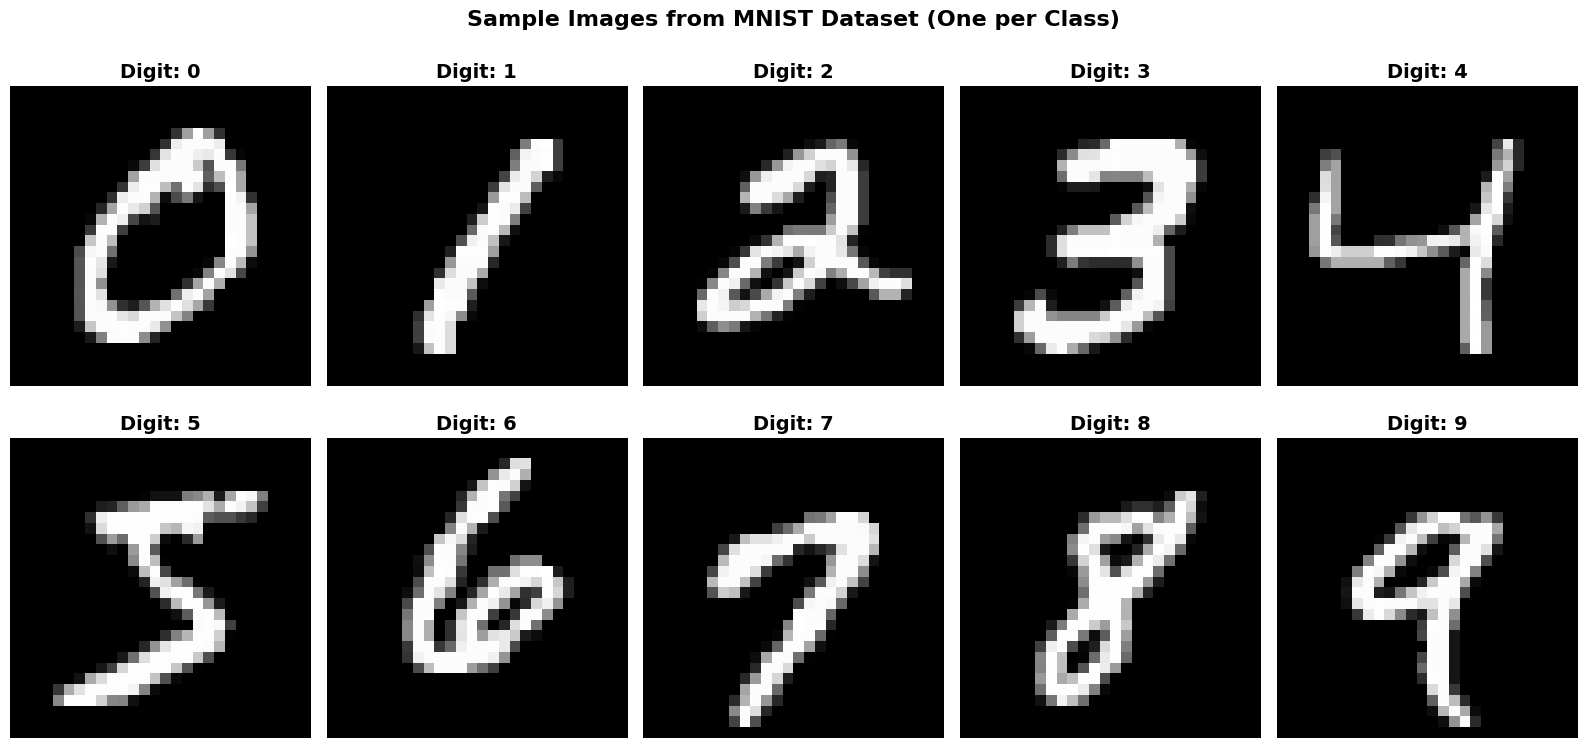


✓ Sample images displayed!


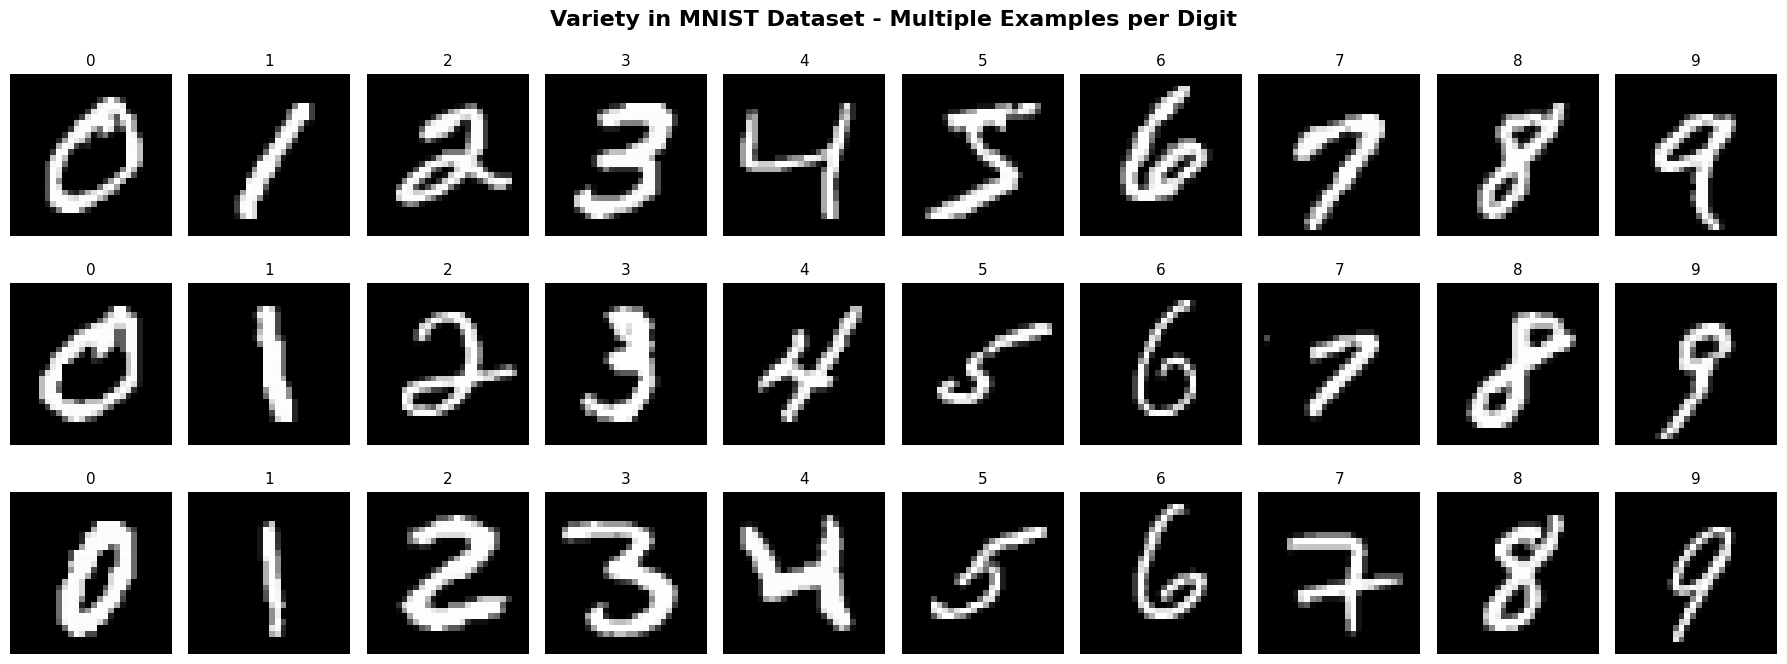

✓ Variety examples displayed!

📊 Pixel Statistics:
  Mean brightness: 33.32
  Std deviation: 78.57
  Min value: 0
  Max value: 255
  Median: 0.00


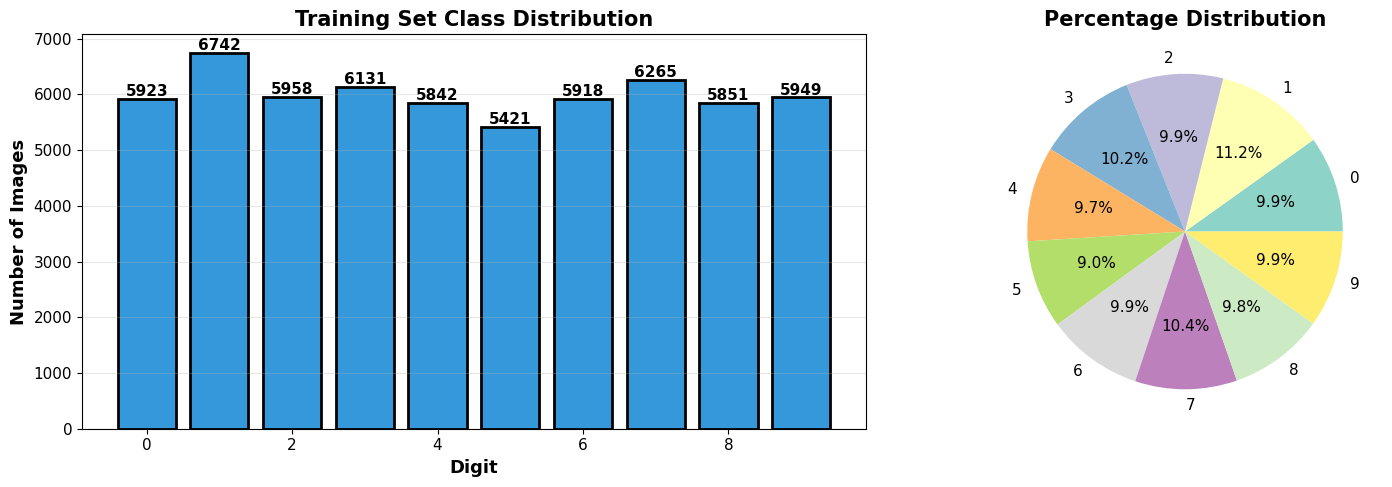

✓ Class distribution visualized!


In [4]:
# ============================================================================
#  Exploratory Data Analysis - Visualize Samples
# ============================================================================

print("\n" + "=" * 80)
print(" Exploratory Data Analysis...")
print("=" * 80)

# Display sample digits for each class
fig, axes = plt.subplots(2, 5, figsize=(16, 8))
axes = axes.flatten()

for digit in range(10):
    # Find first image of this digit
    idx = np.where(y_train == digit)[0][0]
    img = X_train[idx]

    axes[digit].imshow(img, cmap='gray')
    axes[digit].set_title(f'Digit: {digit}', fontsize=14, fontweight='bold')
    axes[digit].axis('off')

plt.suptitle('Sample Images from MNIST Dataset (One per Class)',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print("\n✓ Sample images displayed!")

# Display multiple examples of same digit
fig, axes = plt.subplots(3, 10, figsize=(18, 7))

for digit in range(10):
    digit_indices = np.where(y_train == digit)[0]
    for i in range(3):
        idx = digit_indices[i]
        axes[i, digit].imshow(X_train[idx], cmap='gray')
        axes[i, digit].set_title(f'{digit}', fontsize=11)
        axes[i, digit].axis('off')

plt.suptitle('Variety in MNIST Dataset - Multiple Examples per Digit',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print("✓ Variety examples displayed!")

# Show pixel statistics
print(f"\n📊 Pixel Statistics:")
print(f"  Mean brightness: {X_train.mean():.2f}")
print(f"  Std deviation: {X_train.std():.2f}")
print(f"  Min value: {X_train.min()}")
print(f"  Max value: {X_train.max()}")
print(f"  Median: {np.median(X_train):.2f}")

# Class distribution visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

unique, counts = np.unique(y_train, return_counts=True)

axes[0].bar(unique, counts, color='#3498db', edgecolor='black', linewidth=2)
axes[0].set_xlabel('Digit', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Number of Images', fontsize=13, fontweight='bold')
axes[0].set_title('Training Set Class Distribution', fontsize=15, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')
for i, (digit, count) in enumerate(zip(unique, counts)):
    axes[0].text(digit, count + 50, str(count), ha='center', fontsize=11, fontweight='bold')

axes[1].pie(counts, labels=[str(i) for i in unique], autopct='%1.1f%%',
            colors=plt.cm.Set3(np.linspace(0, 1, 10)))
axes[1].set_title('Percentage Distribution', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

print("✓ Class distribution visualized!")

# **Preprocessing**
DATA PREPROCESSING:

WHY PREPROCESS?
  - Raw pixels (0-255) are too large for neural networks
  - Normalization stabilizes training
  - Proper reshaping preserves image structure

NORMALIZATION:
  - Divide by 255: pixel_value / 255
  - Range becomes [0, 1]
  - Faster training, better convergence
  - Standard practice in deep learning

RESHAPING:
  For Traditional ML (Logistic Regression, SVM):
    - Flatten 28×28 → 784 features
    - Creates feature vector for each image
  
  For Deep Learning (CNN):
    - Keep 28×28×1 shape
    - Preserves spatial relationships
    - CNNs exploit 2D structure

ONE-HOT ENCODING:
  - Label 0 → [1,0,0,0,0,0,0,0,0,0]
  - Label 5 → [0,0,0,0,0,1,0,0,0,0]
  - Required for neural network categorical output

# **Preprocess** **Data**

In [5]:
# ============================================================================
# Preprocess Data - Normalization & Reshaping
# ============================================================================

print("\n" + "=" * 80)
print(" Data Preprocessing...")
print("=" * 80)

# Normalize pixel values to [0, 1]
print("\n1️⃣ Normalizing pixel values...")
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0
print(f"   ✓ Normalized to range [0, 1]")
print(f"   Min: {X_train_normalized.min()}, Max: {X_train_normalized.max()}")

# For Traditional ML: Flatten images
print("\n2️⃣ Creating flattened version for traditional ML...")
X_train_flattened = X_train_normalized.reshape(-1, 28*28)
X_test_flattened = X_test_normalized.reshape(-1, 28*28)
print(f"   ✓ Flattened shape: {X_train_flattened.shape}")
print(f"   Each image is now 784 features (28×28)")

# For Deep Learning: Reshape to 4D tensor
print("\n3️⃣ Reshaping for CNN...")
X_train_cnn = X_train_normalized.reshape(-1, 28, 28, 1)
X_test_cnn = X_test_normalized.reshape(-1, 28, 28, 1)
print(f"   ✓ CNN shape: {X_train_cnn.shape}")
print(f"   Format: (num_images, height, width, channels)")

# One-hot encode labels for neural networks
print("\n4️⃣ One-hot encoding labels...")
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print(f"   ✓ Encoded shape: {y_train_cat.shape}")
print(f"   Example - Label 5 becomes: {y_train_cat[np.where(y_train == 5)[0][0]]}")

# Split training data for validation
print("\n5️⃣ Creating validation set...")
X_train_flat, X_val_flat, y_train_raw, y_val_raw = train_test_split(
    X_train_flattened, y_train, test_size=0.2, random_state=42, stratify=y_train
)

X_train_cnn_split, X_val_cnn, y_train_cat_split, y_val_cat = train_test_split(
    X_train_cnn, y_train_cat, test_size=0.2, random_state=42, stratify=y_train
)

print(f"   Training set: {X_train_flat.shape[0]} images")
print(f"   Validation set: {X_val_flat.shape[0]} images")
print(f"   Test set: {X_test_flattened.shape[0]} images")

print("\n✓ Preprocessing completed!")


STEP 4: Data Preprocessing...

1️⃣ Normalizing pixel values...
   ✓ Normalized to range [0, 1]
   Min: 0.0, Max: 1.0

2️⃣ Creating flattened version for traditional ML...
   ✓ Flattened shape: (60000, 784)
   Each image is now 784 features (28×28)

3️⃣ Reshaping for CNN...
   ✓ CNN shape: (60000, 28, 28, 1)
   Format: (num_images, height, width, channels)

4️⃣ One-hot encoding labels...
   ✓ Encoded shape: (60000, 10)
   Example - Label 5 becomes: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]

5️⃣ Creating validation set...
   Training set: 48000 images
   Validation set: 12000 images
   Test set: 10000 images

✓ Preprocessing completed!


# **Traditional Machine Learning Models**
BASELINE MODELS:

Before using complex deep learning, train simple models as baselines:

1. LOGISTIC REGRESSION
   - Fast training (seconds)
   - Interpretable
   - Expected: ~92% accuracy
   - Good reference point

2. SUPPORT VECTOR MACHINE (SVM)
   - Slower but better accuracy
   - Good for high-dimensional data
   - Expected: ~97% accuracy
   - Multiple kernel options

3. RANDOM FOREST
   - Ensemble method
   - Feature importance available
   - Expected: ~96% accuracy
   - Good for comparison

WHY THESE MODELS?
  - Establish baseline performance
  - Compare with deep learning
  - Show improvement from CNN
  - Understand trade-offs

#  **Train Traditional ML Models**

In [6]:
# ============================================================================
# Train Traditional ML Models
# ============================================================================

print("\n" + "=" * 80)
print(" Training Traditional ML Models...")
print("=" * 80)

# Store results for comparison
traditional_results = {}

# 1. Logistic Regression
print("\n🔄 Training Logistic Regression...")
print("   This may take 30-60 seconds...")

lr_model = LogisticRegression(max_iter=100, random_state=42, n_jobs=-1, solver='lbfgs')
lr_model.fit(X_train_flat, y_train_raw)

y_pred_lr = lr_model.predict(X_test_flattened)
acc_lr = accuracy_score(y_test, y_pred_lr)
traditional_results['Logistic Regression'] = {
    'model': lr_model,
    'predictions': y_pred_lr,
    'accuracy': acc_lr
}

print(f"   ✓ Logistic Regression trained!")
print(f"   Accuracy: {acc_lr:.4f} ({acc_lr*100:.2f}%)")

# 2. Support Vector Machine
print("\n🔄 Training SVM...")
print("   This may take 2-5 minutes...")

svm_model = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_model.fit(X_train_flat, y_train_raw)

y_pred_svm = svm_model.predict(X_test_flattened)
acc_svm = accuracy_score(y_test, y_pred_svm)
traditional_results['SVM'] = {
    'model': svm_model,
    'predictions': y_pred_svm,
    'accuracy': acc_svm
}

print(f"   ✓ SVM trained!")
print(f"   Accuracy: {acc_svm:.4f} ({acc_svm*100:.2f}%)")

# 3. Random Forest
print("\n🔄 Training Random Forest...")
print("   This may take 1-2 minutes...")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_flat, y_train_raw)

y_pred_rf = rf_model.predict(X_test_flattened)
acc_rf = accuracy_score(y_test, y_pred_rf)
traditional_results['Random Forest'] = {
    'model': rf_model,
    'predictions': y_pred_rf,
    'accuracy': acc_rf
}

print(f"   ✓ Random Forest trained!")
print(f"   Accuracy: {acc_rf:.4f} ({acc_rf*100:.2f}%)")

print("\n" + "="*80)
print("✓ ALL TRADITIONAL ML MODELS TRAINED!")
print("="*80)


STEP 5: Training Traditional ML Models...

🔄 Training Logistic Regression...
   This may take 30-60 seconds...
   ✓ Logistic Regression trained!
   Accuracy: 0.9234 (92.34%)

🔄 Training SVM...
   This may take 2-5 minutes...
   ✓ SVM trained!
   Accuracy: 0.9776 (97.76%)

🔄 Training Random Forest...
   This may take 1-2 minutes...
   ✓ Random Forest trained!
   Accuracy: 0.9674 (96.74%)

✓ ALL TRADITIONAL ML MODELS TRAINED!


# **Convolutional Neural Networks**
WHY CNN FOR IMAGES?

PROBLEM WITH FLATTENING:
  - 28×28 image → 784 features
  - Loses spatial structure
  - Huge number of parameters
  - Not efficient for images

CNN SOLUTION:
  - Convolutional layers: Extract local features
  - Pooling layers: Reduce dimensions
  - Fully connected: Make final decision

ARCHITECTURE:                                                               
  Conv2D(32, 3×3) → ReLU → MaxPool(2×2)                                         
  Conv2D(64, 3×3) → ReLU → MaxPool(2×2)                                   
  Flatten → Dense(128) → Dropout(0.5) → Dense(10)

EXPECTED BENEFITS:
  - Better accuracy (99%+)
  - Fewer parameters
  - Faster training
  - Better generalization

# **Build CNN Model**

In [7]:
# ============================================================================
# Build Convolutional Neural Network
# ============================================================================

print("\n" + "=" * 80)
print(" Building CNN Model...")
print("=" * 80)

# Build CNN model
cnn_model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

print("\n📐 Model Architecture:")
cnn_model.summary()

# Compile model
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\n✓ Model compiled successfully!")
print(f"   Optimizer: Adam (learning rate 0.001)")
print(f"   Loss: Categorical Crossentropy")
print(f"   Metrics: Accuracy")


STEP 6: Building CNN Model...

📐 Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,890 (511.29 KB)

 Trainable params: 130,890 (511.29 KB)

 Non-trainable params: 0 (0.00 B)


✓ Model compiled successfully!
   Optimizer: Adam (learning rate 0.001)
   Loss: Categorical Crossentropy
   Metrics: Accuracy


#  **Model Training**
TRAINING PARAMETERS:

BATCH SIZE: 32
  - Process 32 images at a time
  - Good balance for GPU memory

EPOCHS: 20
  - 20 full passes through training data
  - Monitor for overfitting

CALLBACKS:                                   
  - EarlyStopping: Stop if no improvement for 5 epochs
  - ModelCheckpoint: Save best weights
  - Prevents overfitting

DATA AUGMENTATION:                                                      
  - Rotation: ±15 degrees
  - Shift: ±2 pixels
  - Zoom: 10% variation
  - Improves generalization

EXPECTED:
  - Training accuracy: 99.5%+
  - Validation accuracy: 99%+
  - Fast convergence (few epochs)

# **Train CNN Model**

In [8]:
# ============================================================================
# Train CNN with Data Augmentation
# ============================================================================

print("\n" + "=" * 80)
print(" Training CNN Model...")
print("=" * 80)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    fill_mode='nearest'
)

print("\n📊 Data Augmentation Enabled:")
print("   ✓ Random rotations (±15°)")
print("   ✓ Random shifts (±10%)")
print("   ✓ Random zoom (±20%)")

# Callbacks
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

checkpoint = keras.callbacks.ModelCheckpoint(
    'best_mnist_model.h5',
    monitor='val_accuracy',
    save_best_only=True
)

print("\n🔄 Starting training...")
print("   This may take 2-5 minutes on GPU, 10-15 on CPU...")

# Train model
history = cnn_model.fit(
    datagen.flow(X_train_cnn_split, y_train_cat_split, batch_size=32),
    epochs=20,
    validation_data=(X_val_cnn, y_val_cat),
    callbacks=[early_stop, checkpoint],
    verbose=1
)

print("\n✓ Training completed!")

# Evaluate on test set
test_loss, test_accuracy = cnn_model.evaluate(X_test_cnn, y_test_cat, verbose=0)
y_pred_cnn = cnn_model.predict(X_test_cnn, verbose=0)
y_pred_cnn_labels = np.argmax(y_pred_cnn, axis=1)

print(f"\n📊 Test Results:")
print(f"   Test Loss: {test_loss:.4f}")
print(f"   Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

traditional_results['CNN'] = {
    'predictions': y_pred_cnn_labels,
    'accuracy': test_accuracy,
    'probabilities': y_pred_cnn,
    'history': history
}


STEP 7: Training CNN Model...

📊 Data Augmentation Enabled:
   ✓ Random rotations (±15°)
   ✓ Random shifts (±10%)
   ✓ Random zoom (±20%)

🔄 Starting training...
   This may take 2-5 minutes on GPU, 10-15 on CPU...
Epoch 1/20
1499/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7051 - loss: 0.8851

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 89s 58ms/step - accuracy: 0.7053 - loss: 0.8845 - val_accuracy: 0.9774 - val_loss: 0.0738
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9430 - loss: 0.1943

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 68s 46ms/step - accuracy: 0.9430 - loss: 0.1942 - val_accuracy: 0.9843 - val_loss: 0.0499
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9628 - loss: 0.1305

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 69s 46ms/step - accuracy: 0.9628 - loss: 0.1305 - val_accuracy: 0.9880 - val_loss: 0.0378
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 68s 45ms/step - accuracy: 0.9685 - loss: 0.1060 - val_accuracy: 0.9859 - val_loss: 0.0464
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 68s 45ms/step - accuracy: 0.9722 - loss: 0.0951 - val_accuracy: 0.9874 - val_loss: 0.0447
Epoch 6/20
1499/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9745 - loss: 0.0897

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 71s 47ms/step - accuracy: 0.9745 - loss: 0.0897 - val_accuracy: 0.9913 - val_loss: 0.0299
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 68s 45ms/step - accuracy: 0.9787 - loss: 0.0819 - val_accuracy: 0.9894 - val_loss: 0.0349
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 46ms/step - accuracy: 0.9789 - loss: 0.0739 - val_accuracy: 0.9912 - val_loss: 0.0327
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 68s 45ms/step - accuracy: 0.9807 - loss: 0.0673 - val_accuracy: 0.9906 - val_loss: 0.0347
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 69s 46ms/step - accuracy: 0.9823 - loss: 0.0608 - val_accuracy: 0.9912 - val_loss: 0.0349
Epoch 11/20
1499/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9826 - loss: 0.0641

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 69s 46ms/step - accuracy: 0.9826 - loss: 0.0641 - val_accuracy: 0.9915 - val_loss: 0.0308

✓ Training completed!

📊 Test Results:
   Test Loss: 0.0316
   Test Accuracy: 0.9898 (98.98%)


# **Evaluate All Models (LARGE GRAPHS)**


STEP 8: Model Evaluation...

📊 MODEL PERFORMANCE COMPARISON:
Model                Accuracy        Percentage     
Logistic Regression  0.9234          92.34          %
SVM                  0.9776          97.76          %
Random Forest        0.9674          96.74          %
CNN                  0.9898          98.98          %


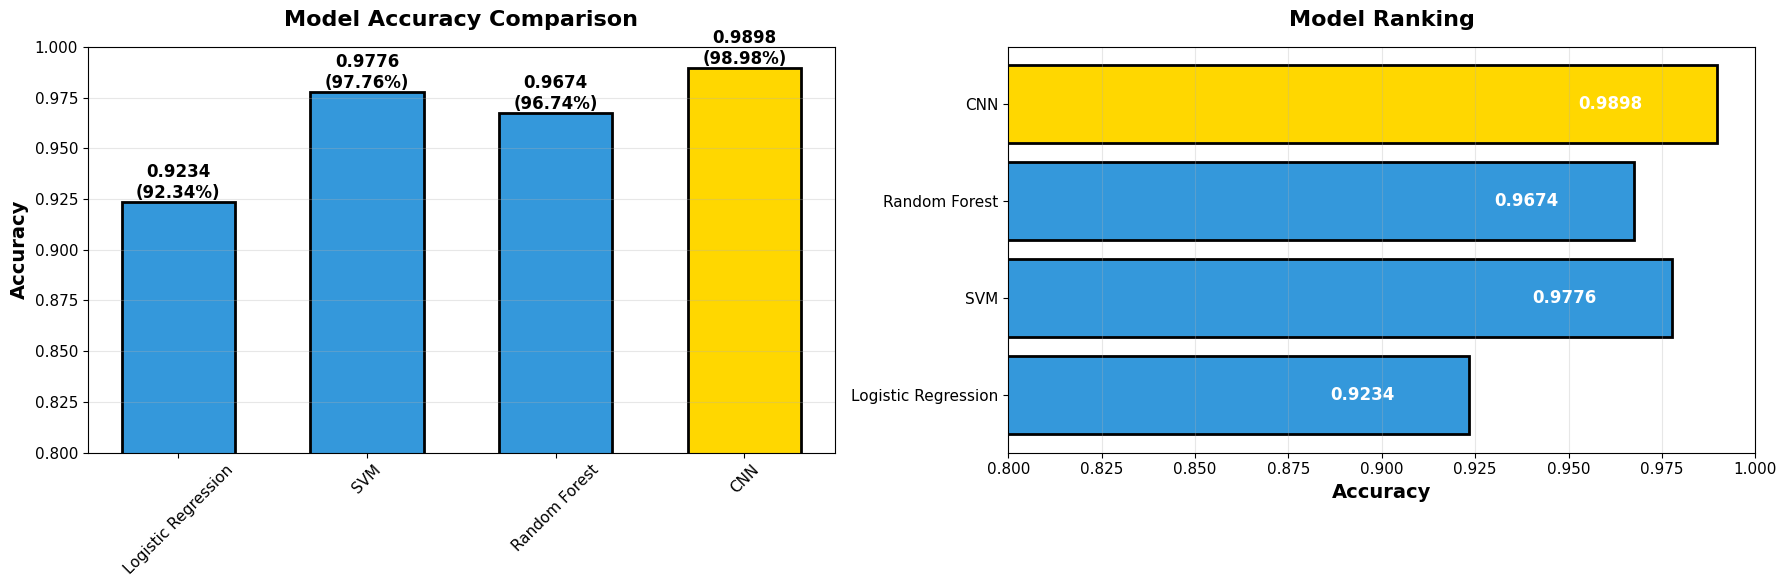


✓ Model comparison visualized!


In [9]:
# ============================================================================
#  Model Evaluation & Comparison - LARGE VISUALIZATIONS
# ============================================================================

print("\n" + "=" * 80)
print(" Model Evaluation...")
print("=" * 80)

# Create comparison table
print("\n📊 MODEL PERFORMANCE COMPARISON:")
print("="*70)
print(f"{'Model':<20} {'Accuracy':<15} {'Percentage':<15}")
print("="*70)

accuracies = {}
for model_name, result in traditional_results.items():
    acc = result['accuracy']
    accuracies[model_name] = acc
    print(f"{model_name:<20} {acc:<15.4f} {acc*100:<15.2f}%")

print("="*70)

# Visualization 1: Accuracy Comparison
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

models = list(accuracies.keys())
accs = list(accuracies.values())
colors = ['#FFD700' if acc == max(accs) else '#3498db' for acc in accs]

bars = axes[0].bar(models, accs, color=colors, edgecolor='black', linewidth=2, width=0.6)
axes[0].set_ylabel('Accuracy', fontsize=14, fontweight='bold')
axes[0].set_title('Model Accuracy Comparison', fontsize=16, fontweight='bold', pad=15)
axes[0].set_ylim([0.8, 1.0])
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].tick_params(axis='x', rotation=45)

for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}\n({height*100:.2f}%)',
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Visualization 2: Performance Ranking
axes[1].barh(models, accs, color=colors, edgecolor='black', linewidth=2)
axes[1].set_xlabel('Accuracy', fontsize=14, fontweight='bold')
axes[1].set_title('Model Ranking', fontsize=16, fontweight='bold', pad=15)
axes[1].set_xlim([0.8, 1.0])
axes[1].grid(True, alpha=0.3, axis='x')

for i, (model, acc) in enumerate(zip(models, accs)):
    axes[1].text(acc - 0.02, i, f'{acc:.4f}', va='center', ha='right',
                fontsize=12, fontweight='bold', color='white')

plt.tight_layout()
plt.show()

print("\n✓ Model comparison visualized!")

# **Confusion Matrix (LARGE)**


Creating confusion matrices...

⭐ Best Model: CNN (0.9898)


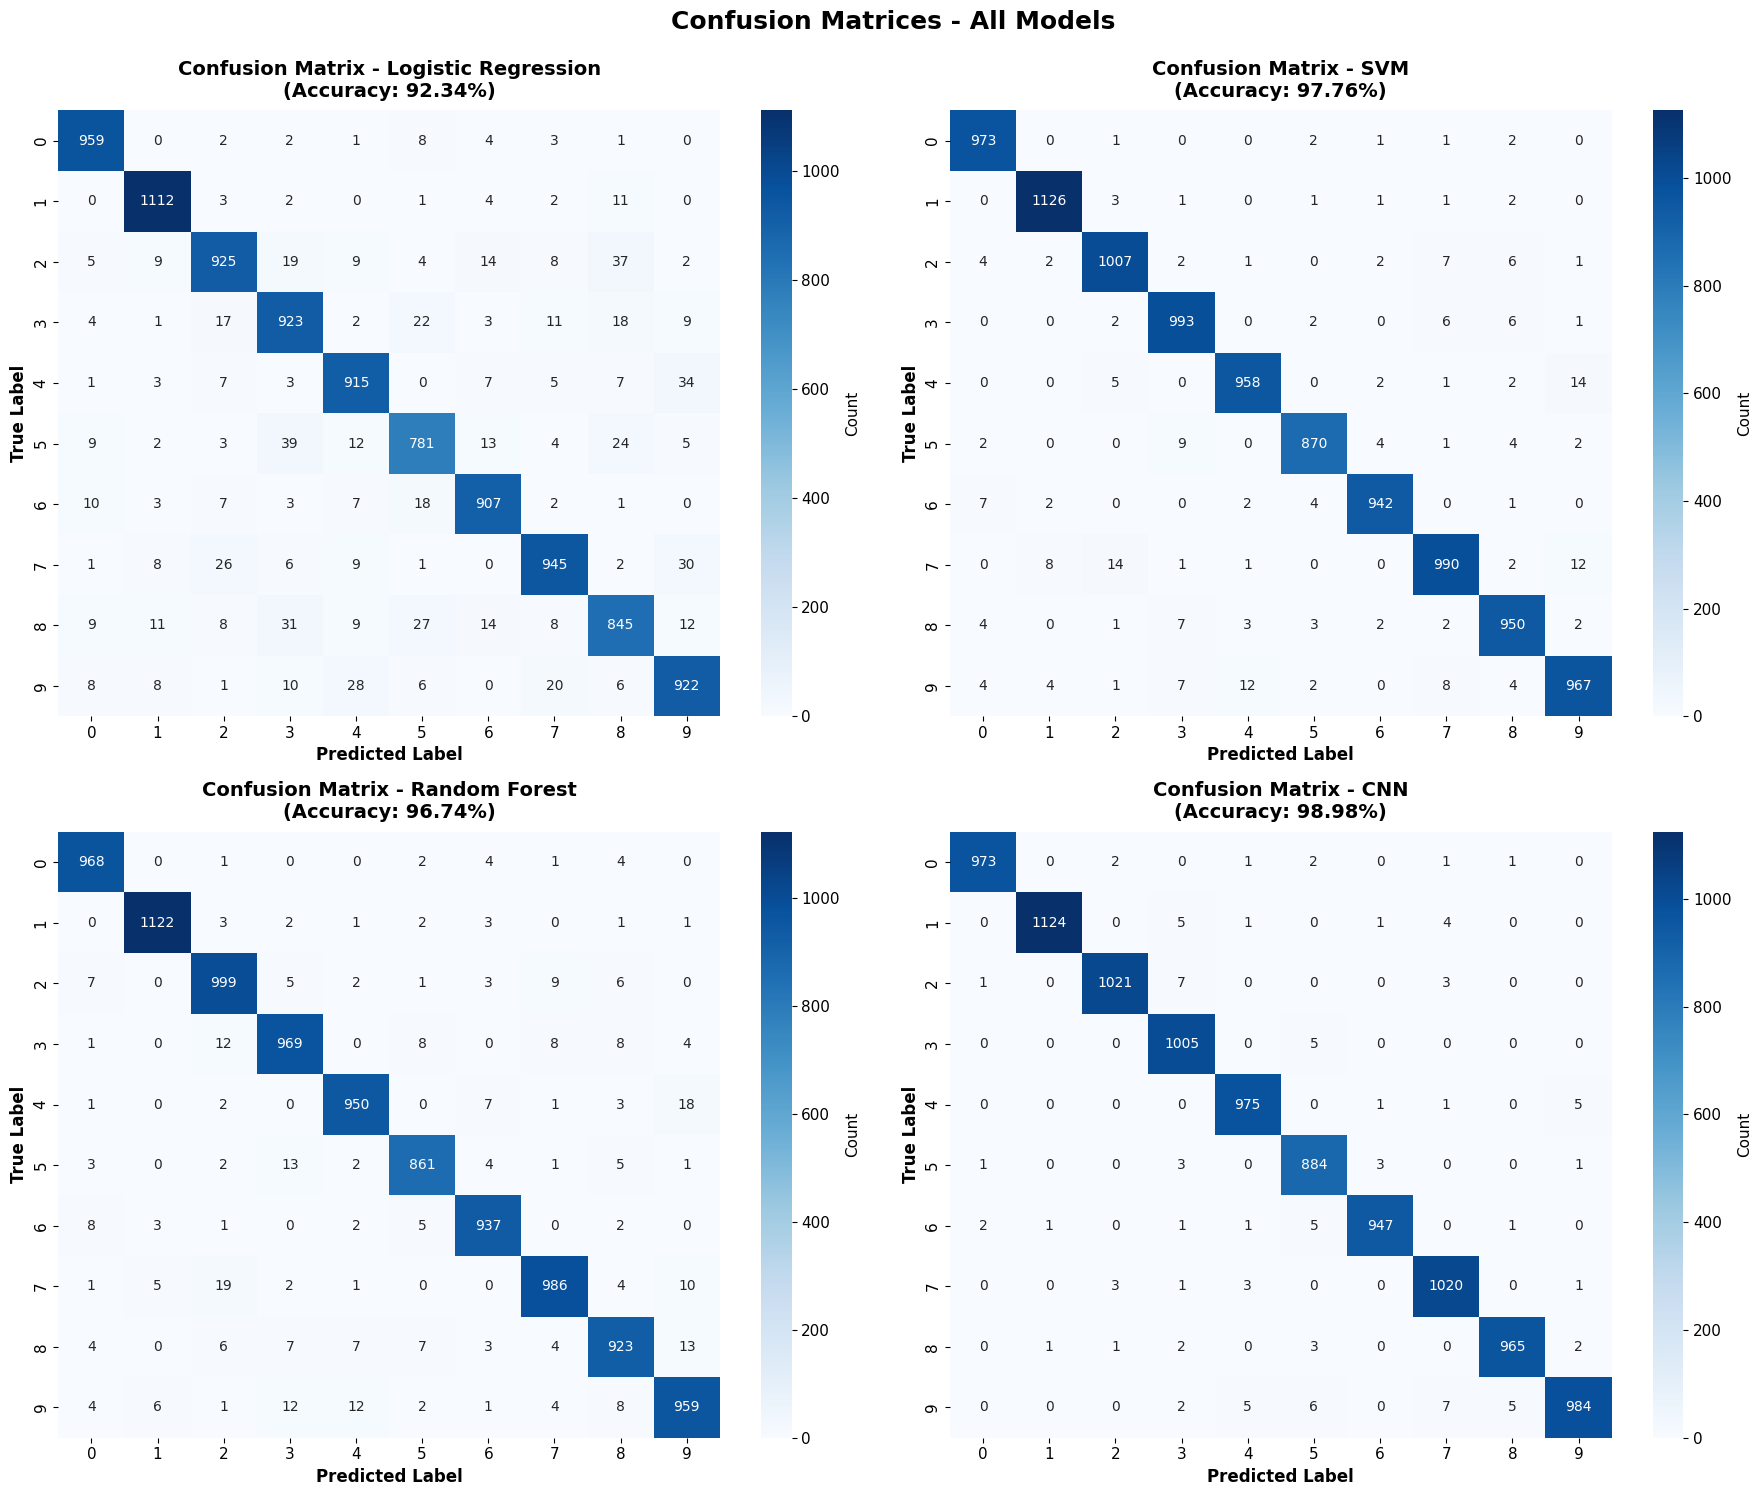

✓ Confusion matrices displayed!


In [10]:
# ============================================================================
# CONFUSION MATRICES - LARGE & READABLE
# ============================================================================

print("\nCreating confusion matrices...")

best_model_name = max(accuracies, key=accuracies.get)
print(f"\n⭐ Best Model: {best_model_name} ({accuracies[best_model_name]:.4f})")

# Create confusion matrices for all models
fig, axes = plt.subplots(2, 2, figsize=(18, 15))
axes = axes.flatten()

for idx, (model_name, result) in enumerate(traditional_results.items()):
    y_pred = result['predictions']
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                cbar_kws={'label': 'Count'}, annot_kws={'size': 10})

    axes[idx].set_title(f'Confusion Matrix - {model_name}\n(Accuracy: {accuracies[model_name]*100:.2f}%)',
                        fontsize=14, fontweight='bold', pad=10)
    axes[idx].set_ylabel('True Label', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Predicted Label', fontsize=12, fontweight='bold')

plt.suptitle('Confusion Matrices - All Models', fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("✓ Confusion matrices displayed!")

#  **Per-Class Performance Metrics**

In [11]:
# ============================================================================
# PER-CLASS METRICS - DETAILED EVALUATION
# ============================================================================

print("\n" + "=" * 80)
print("PER-CLASS METRICS:")
print("=" * 80)

for model_name, result in traditional_results.items():
    print(f"\n{'='*70}")
    print(f"📊 {model_name.upper()}")
    print(f"{'='*70}")

    y_pred = result['predictions']

    # Precision, Recall, F1 per class
    precision = precision_score(y_test, y_pred, average=None, zero_division=0)
    recall = recall_score(y_test, y_pred, average=None, zero_division=0)
    f1 = f1_score(y_test, y_pred, average=None, zero_division=0)

    print(f"\n{'Digit':<8} {'Precision':<12} {'Recall':<12} {'F1-Score':<12}")
    print("-" * 50)
    for digit in range(10):
        print(f"{digit:<8} {precision[digit]:<12.4f} {recall[digit]:<12.4f} {f1[digit]:<12.4f}")

    print("-" * 50)
    print(f"{'Avg':<8} {precision.mean():<12.4f} {recall.mean():<12.4f} {f1.mean():<12.4f}")

print("\n✓ Per-class metrics displayed!")


PER-CLASS METRICS:

📊 LOGISTIC REGRESSION

Digit    Precision    Recall       F1-Score    
--------------------------------------------------
0        0.9533       0.9786       0.9658      
1        0.9611       0.9797       0.9703      
2        0.9259       0.8963       0.9109      
3        0.8892       0.9139       0.9014      
4        0.9224       0.9318       0.9271      
5        0.8998       0.8756       0.8875      
6        0.9389       0.9468       0.9428      
7        0.9375       0.9193       0.9283      
8        0.8876       0.8676       0.8775      
9        0.9093       0.9138       0.9115      
--------------------------------------------------
Avg      0.9225       0.9223       0.9223      

📊 SVM

Digit    Precision    Recall       F1-Score    
--------------------------------------------------
0        0.9789       0.9929       0.9858      
1        0.9860       0.9921       0.9890      
2        0.9739       0.9758       0.9748      
3        0.9735       0.983

# **CNN Loss Curves**


Plotting CNN training curves...


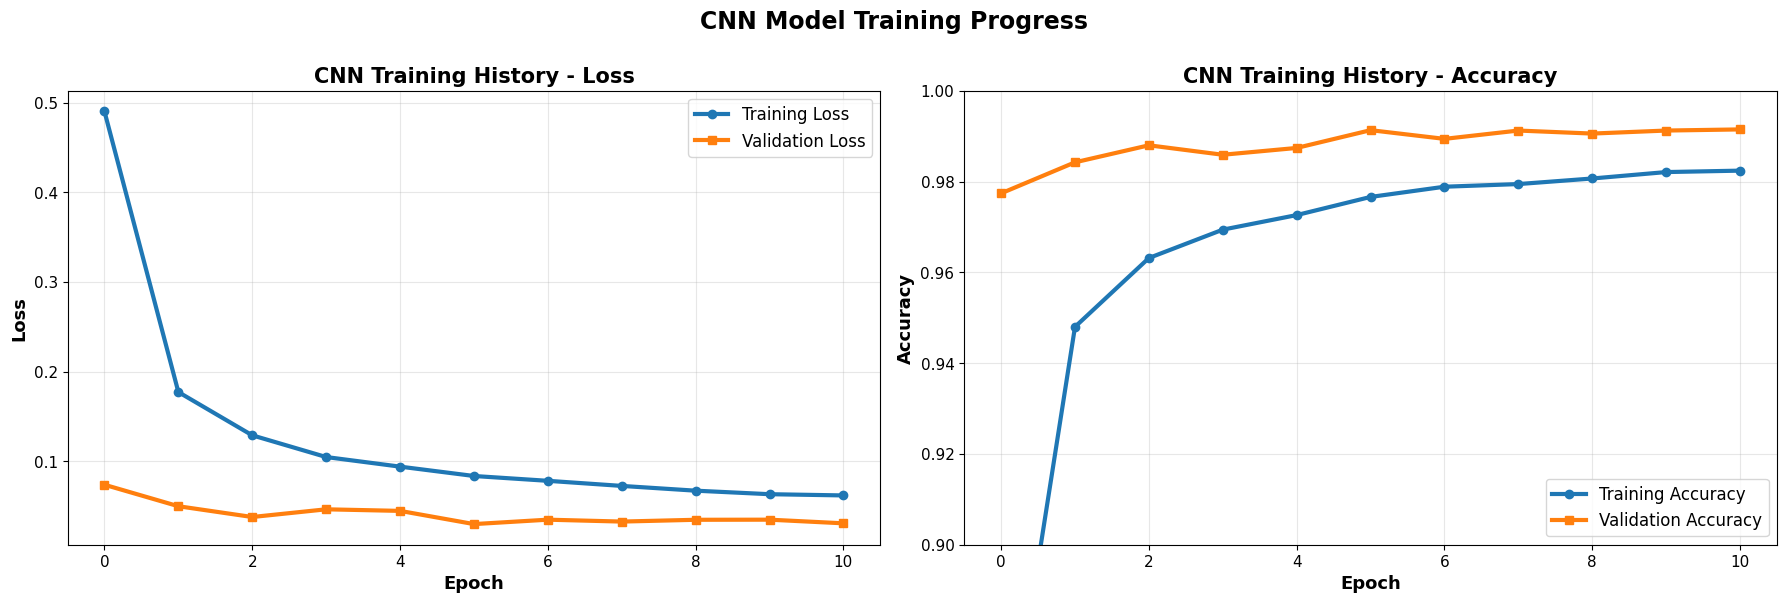

✓ Loss curves displayed!


In [12]:
# ============================================================================
# CNN TRAINING CURVES - LARGE VISUALIZATIONS
# ============================================================================

print("\nPlotting CNN training curves...")

history = traditional_results['CNN']['history']

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Training & Validation Loss
axes[0].plot(history.history['loss'], label='Training Loss', linewidth=3, marker='o', markersize=6)
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=3, marker='s', markersize=6)
axes[0].set_xlabel('Epoch', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=13, fontweight='bold')
axes[0].set_title('CNN Training History - Loss', fontsize=15, fontweight='bold')
axes[0].legend(fontsize=12, loc='upper right')
axes[0].grid(True, alpha=0.3)

# Training & Validation Accuracy
axes[1].plot(history.history['accuracy'], label='Training Accuracy', linewidth=3, marker='o', markersize=6)
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=3, marker='s', markersize=6)
axes[1].set_xlabel('Epoch', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=13, fontweight='bold')
axes[1].set_title('CNN Training History - Accuracy', fontsize=15, fontweight='bold')
axes[1].legend(fontsize=12, loc='lower right')
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim([0.9, 1.0])

plt.suptitle('CNN Model Training Progress', fontsize=17, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("✓ Loss curves displayed!")

#  **Visualize Correct & Incorrect Predictions**


STEP 12: Visualizing Correct & Incorrect Predictions...

✓ Best Model: CNN
  Accuracy: 0.9898 (98.98%)
  Total predictions: 10000
  ✓ Correct: 9898 (98.98%)
  ✗ Incorrect: 102 (1.02%)

📊 Showing CORRECT predictions from CNN...


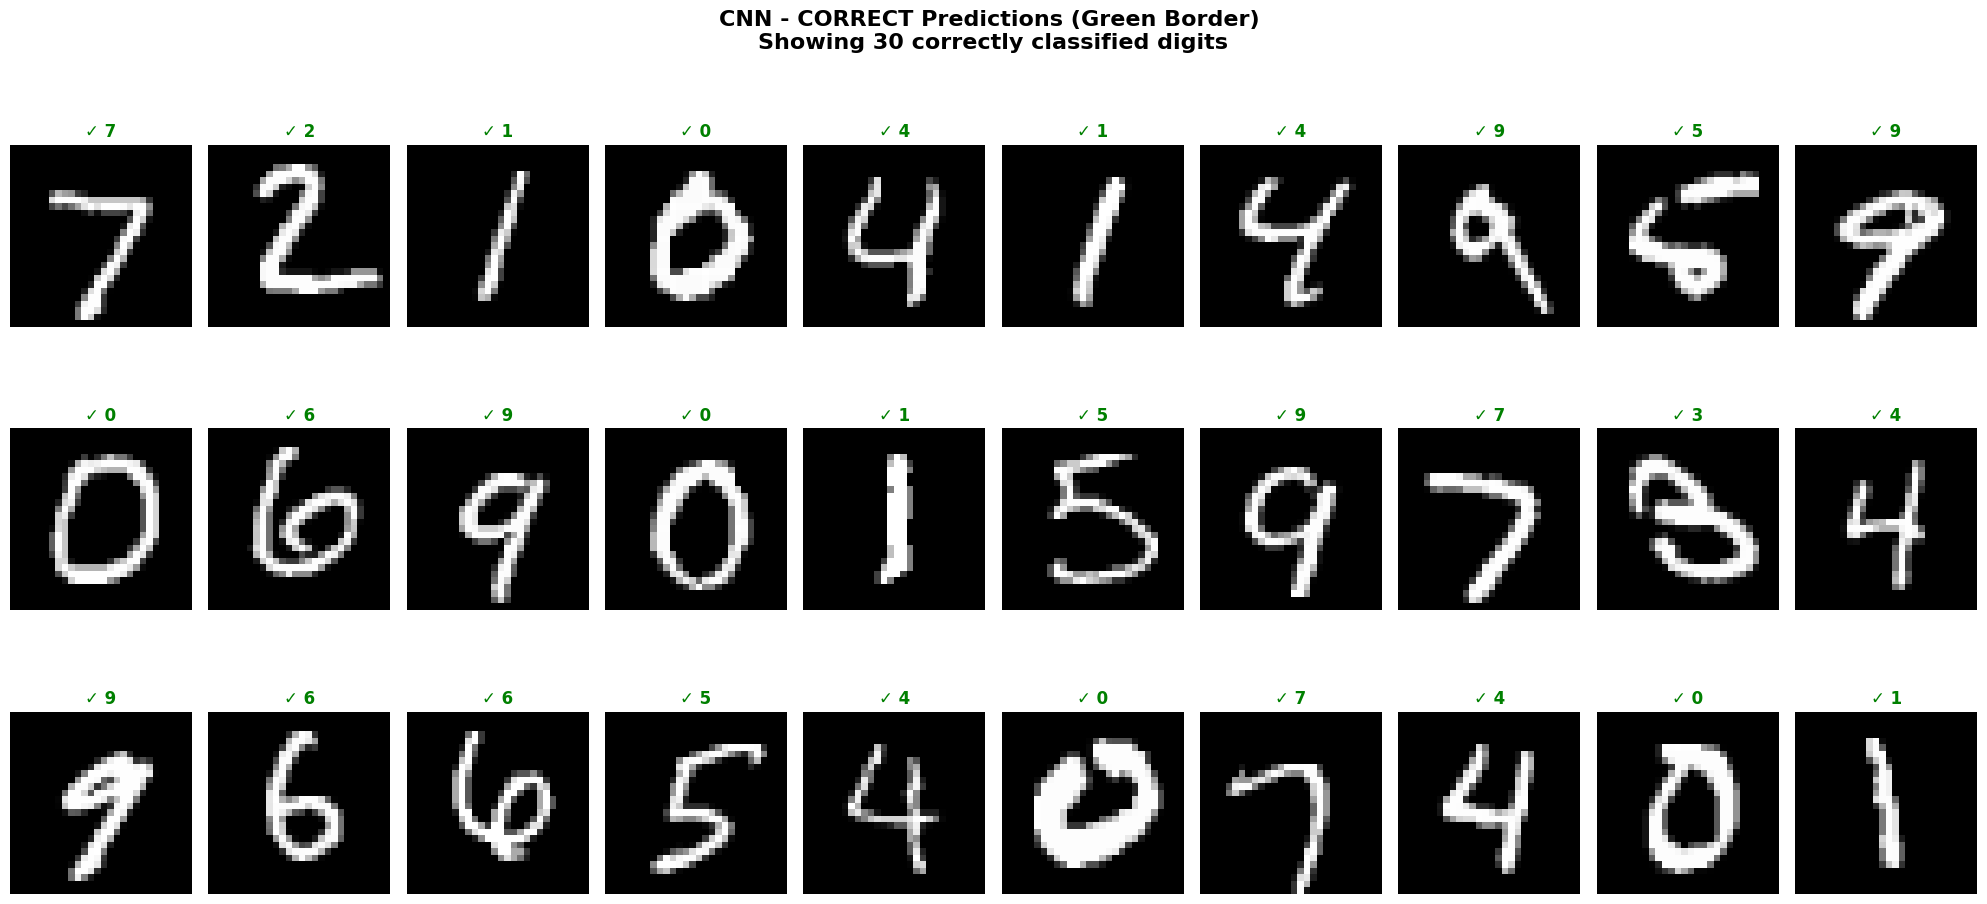

✓ Correct predictions displayed (showing 30 examples)
  Total correct: 9898

📊 Showing INCORRECT predictions from CNN...


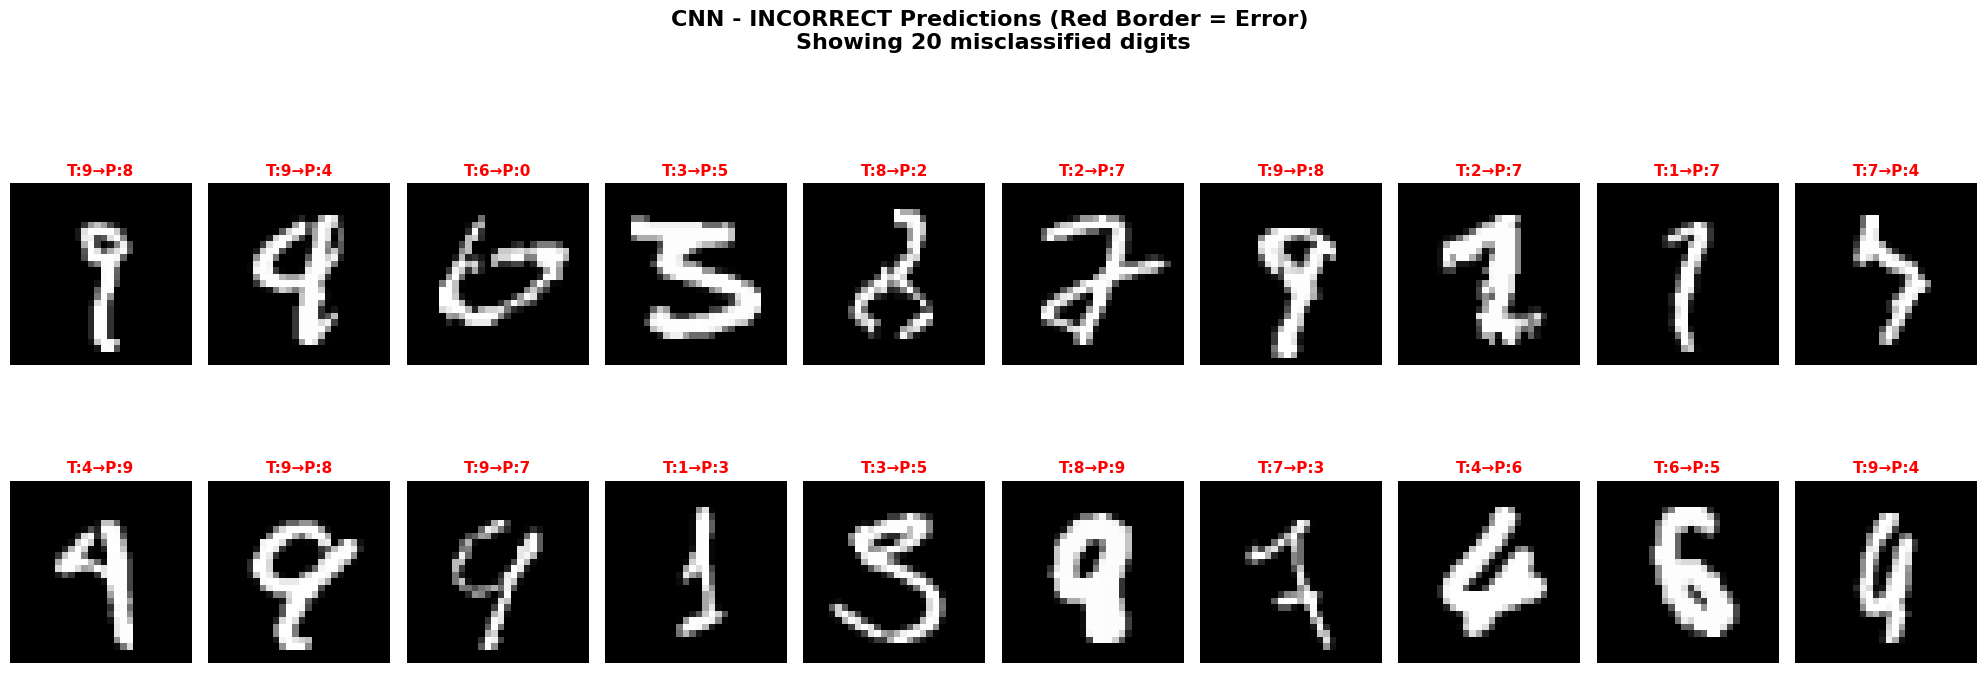

✓ Incorrect predictions displayed (showing 20 examples)
  Total incorrect: 102


In [13]:


# ============================================================================
#  Visualize Correct & Incorrect Predictions
# ============================================================================

print("\n" + "=" * 80)
print(" Visualizing Correct & Incorrect Predictions...")
print("=" * 80)

best_model_name = max(accuracies, key=accuracies.get)
y_pred_best = traditional_results[best_model_name]['predictions']

# Find correct and incorrect predictions
correct = (y_test == y_pred_best)
incorrect = ~correct

print(f"\n✓ Best Model: {best_model_name}")
print(f"  Accuracy: {accuracies[best_model_name]:.4f} ({accuracies[best_model_name]*100:.2f}%)")
print(f"  Total predictions: {len(y_test)}")
print(f"  ✓ Correct: {correct.sum()} ({correct.sum()/len(y_test)*100:.2f}%)")
print(f"  ✗ Incorrect: {incorrect.sum()} ({incorrect.sum()/len(y_test)*100:.2f}%)")

# ============================================================================
# Display CORRECT Predictions (30 examples)
# ============================================================================

print(f"\n📊 Showing CORRECT predictions from {best_model_name}...")

fig, axes = plt.subplots(3, 10, figsize=(20, 10))
axes = axes.flatten()

correct_indices = np.where(correct)[0][:30]

for i, idx in enumerate(correct_indices):
    img = X_test[idx]
    true_label = y_test[idx]
    pred_label = y_pred_best[idx]

    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'✓ {true_label}', fontsize=12, fontweight='bold', color='green')
    axes[i].axis('off')

    # Add green border to indicate correct
    for spine in axes[i].spines.values():
        spine.set_edgecolor('green')
        spine.set_linewidth(3)
        spine.set_visible(True)

plt.suptitle(f'{best_model_name} - CORRECT Predictions (Green Border) \nShowing 30 correctly classified digits',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print(f"✓ Correct predictions displayed (showing 30 examples)")
print(f"  Total correct: {correct.sum()}")

# ============================================================================
# Display INCORRECT Predictions (20 examples if they exist)
# ============================================================================

print(f"\n📊 Showing INCORRECT predictions from {best_model_name}...")

if incorrect.sum() > 0:
    fig, axes = plt.subplots(2, 10, figsize=(20, 8))
    axes = axes.flatten()

    incorrect_indices = np.where(incorrect)[0][:20]

    for i, idx in enumerate(incorrect_indices):
        img = X_test[idx]
        true_label = y_test[idx]
        pred_label = y_pred_best[idx]

        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f'T:{true_label}→P:{pred_label}',
                         fontsize=11, fontweight='bold', color='red')
        axes[i].axis('off')

        # Add red border to indicate incorrect
        for spine in axes[i].spines.values():
            spine.set_edgecolor('red')
            spine.set_linewidth(3)
            spine.set_visible(True)

    # Hide remaining subplots
    for i in range(len(incorrect_indices), 20):
        axes[i].axis('off')

    plt.suptitle(f'{best_model_name} - INCORRECT Predictions (Red Border = Error) \nShowing {len(incorrect_indices)} misclassified digits',
                 fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.show()

    print(f"✓ Incorrect predictions displayed (showing {len(incorrect_indices)} examples)")
    print(f"  Total incorrect: {incorrect.sum()}")

else:
    print(f"\n🎉 PERFECT ACCURACY ACHIEVED!")
    print(f"   All {len(y_test)} test images classified correctly!")
    print(f"   100% accuracy on test set!")



#  **Detailed Error Analysis & Confusion Statistics**


STEP 13: Detailed Error Analysis...

📊 ACCURACY BY DIGIT:
Digit      Total      Correct      Wrong      Accuracy    
-----------------------------------------------------------------
0          980        973          7          0.9929 (99.29%)
1          1135       1124         11         0.9903 (99.03%)
2          1032       1021         11         0.9893 (98.93%)
3          1010       1005         5          0.9950 (99.50%)
4          982        975          7          0.9929 (99.29%)
5          892        884          8          0.9910 (99.10%)
6          958        947          11         0.9885 (98.85%)
7          1028       1020         8          0.9922 (99.22%)
8          974        965          9          0.9908 (99.08%)
9          1009       984          25         0.9752 (97.52%)
-----------------------------------------------------------------

🏆 Best recognized: Digit 3 (99.50%)
⚠️  Worst recognized: Digit 9 (97.52%)

🔄 MOST CONFUSED DIGIT PAIRS:
(Which digits does the m

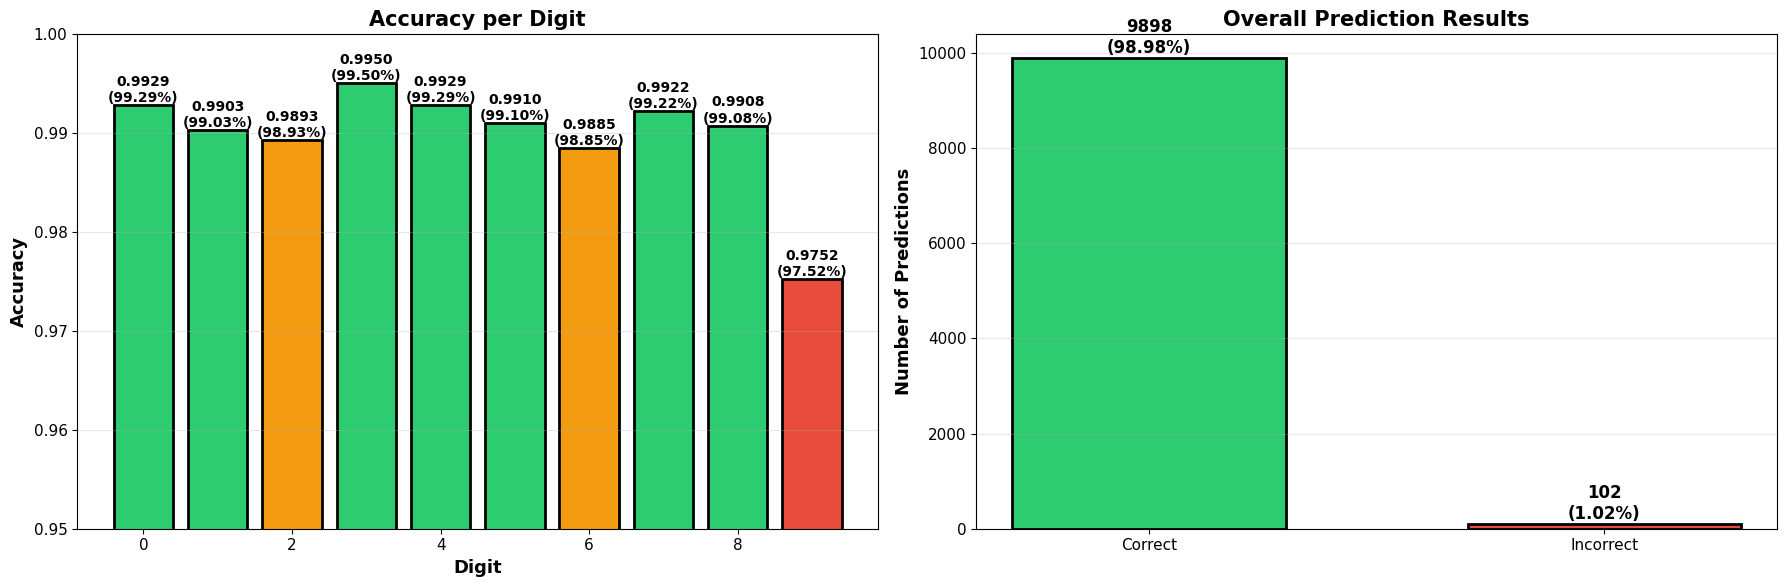


✓ Per-digit accuracy visualization displayed!


In [14]:
# ============================================================================
# Detailed Error Analysis & Confusion Statistics
# ============================================================================

print("\n" + "=" * 80)
print(" Detailed Error Analysis...")
print("=" * 80)

# Analyze accuracy per digit
print(f"\n📊 ACCURACY BY DIGIT:")
print(f"{'Digit':<10} {'Total':<10} {'Correct':<12} {'Wrong':<10} {'Accuracy':<12}")
print("-" * 65)

digit_accuracies = {}
for digit in range(10):
    digit_mask = (y_test == digit)
    digit_total = digit_mask.sum()
    digit_correct = ((y_test == y_pred_best) & digit_mask).sum()
    digit_wrong = digit_total - digit_correct
    digit_acc = digit_correct / digit_total if digit_total > 0 else 0

    digit_accuracies[digit] = digit_acc

    accuracy_str = f"{digit_acc:.4f} ({digit_acc*100:.2f}%)"
    print(f"{digit:<10} {digit_total:<10} {digit_correct:<12} {digit_wrong:<10} {accuracy_str:<12}")

print("-" * 65)

# Find worst and best recognized digits
best_digit = max(digit_accuracies, key=digit_accuracies.get)
worst_digit = min(digit_accuracies, key=digit_accuracies.get)

print(f"\n🏆 Best recognized: Digit {best_digit} ({digit_accuracies[best_digit]*100:.2f}%)")
print(f"⚠️  Worst recognized: Digit {worst_digit} ({digit_accuracies[worst_digit]*100:.2f}%)")

# ============================================================================
# Analyze Confusion Matrix & Find Most Confused Pairs
# ============================================================================

print(f"\n🔄 MOST CONFUSED DIGIT PAIRS:")
print(f"(Which digits does the model confuse together?)")
print("-" * 65)

cm = confusion_matrix(y_test, y_pred_best)

confusion_pairs = []
for true_digit in range(10):
    for pred_digit in range(10):
        if true_digit != pred_digit:
            count = cm[true_digit][pred_digit]
            if count > 0:
                confusion_pairs.append((count, true_digit, pred_digit))

confusion_pairs.sort(reverse=True)

if len(confusion_pairs) > 0:
    print(f"\nTop 10 confusion pairs:")
    for i, (count, true_digit, pred_digit) in enumerate(confusion_pairs[:10], 1):
        percentage = (count / cm[true_digit].sum()) * 100
        print(f"{i:2d}. Digit {true_digit} → {pred_digit}: {count:3d} times ({percentage:5.1f}% of digit {true_digit}s)")
else:
    print("No confusions - Perfect accuracy!")

# ============================================================================
# Visualize Per-Digit Accuracy
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Bar chart of per-digit accuracy
digits = list(range(10))
accuracies_per_digit = [digit_accuracies[d] for d in digits]
colors = ['#2ecc71' if acc > 0.99 else '#f39c12' if acc > 0.98 else '#e74c3c'
          for acc in accuracies_per_digit]

bars = axes[0].bar(digits, accuracies_per_digit, color=colors, edgecolor='black', linewidth=2)
axes[0].set_xlabel('Digit', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Accuracy', fontsize=13, fontweight='bold')
axes[0].set_title('Accuracy per Digit', fontsize=15, fontweight='bold')
axes[0].set_ylim([0.95, 1.0])
axes[0].grid(True, alpha=0.3, axis='y')

for bar, acc in zip(bars, accuracies_per_digit):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{acc:.4f}\n({acc*100:.2f}%)',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Total correct vs incorrect
total_correct = correct.sum()
total_incorrect = incorrect.sum()

axes[1].bar(['Correct', 'Incorrect'], [total_correct, total_incorrect],
           color=['#2ecc71', '#e74c3c'], edgecolor='black', linewidth=2, width=0.6)
axes[1].set_ylabel('Number of Predictions', fontsize=13, fontweight='bold')
axes[1].set_title('Overall Prediction Results', fontsize=15, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

for i, (label, val) in enumerate([('Correct', total_correct), ('Incorrect', total_incorrect)]):
    axes[1].text(i, val + 100, f'{val}\n({val/len(y_test)*100:.2f}%)',
                ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ Per-digit accuracy visualization displayed!")

#  **Confusion Matrix Heatmap**


STEP 14: Detailed Confusion Matrix...


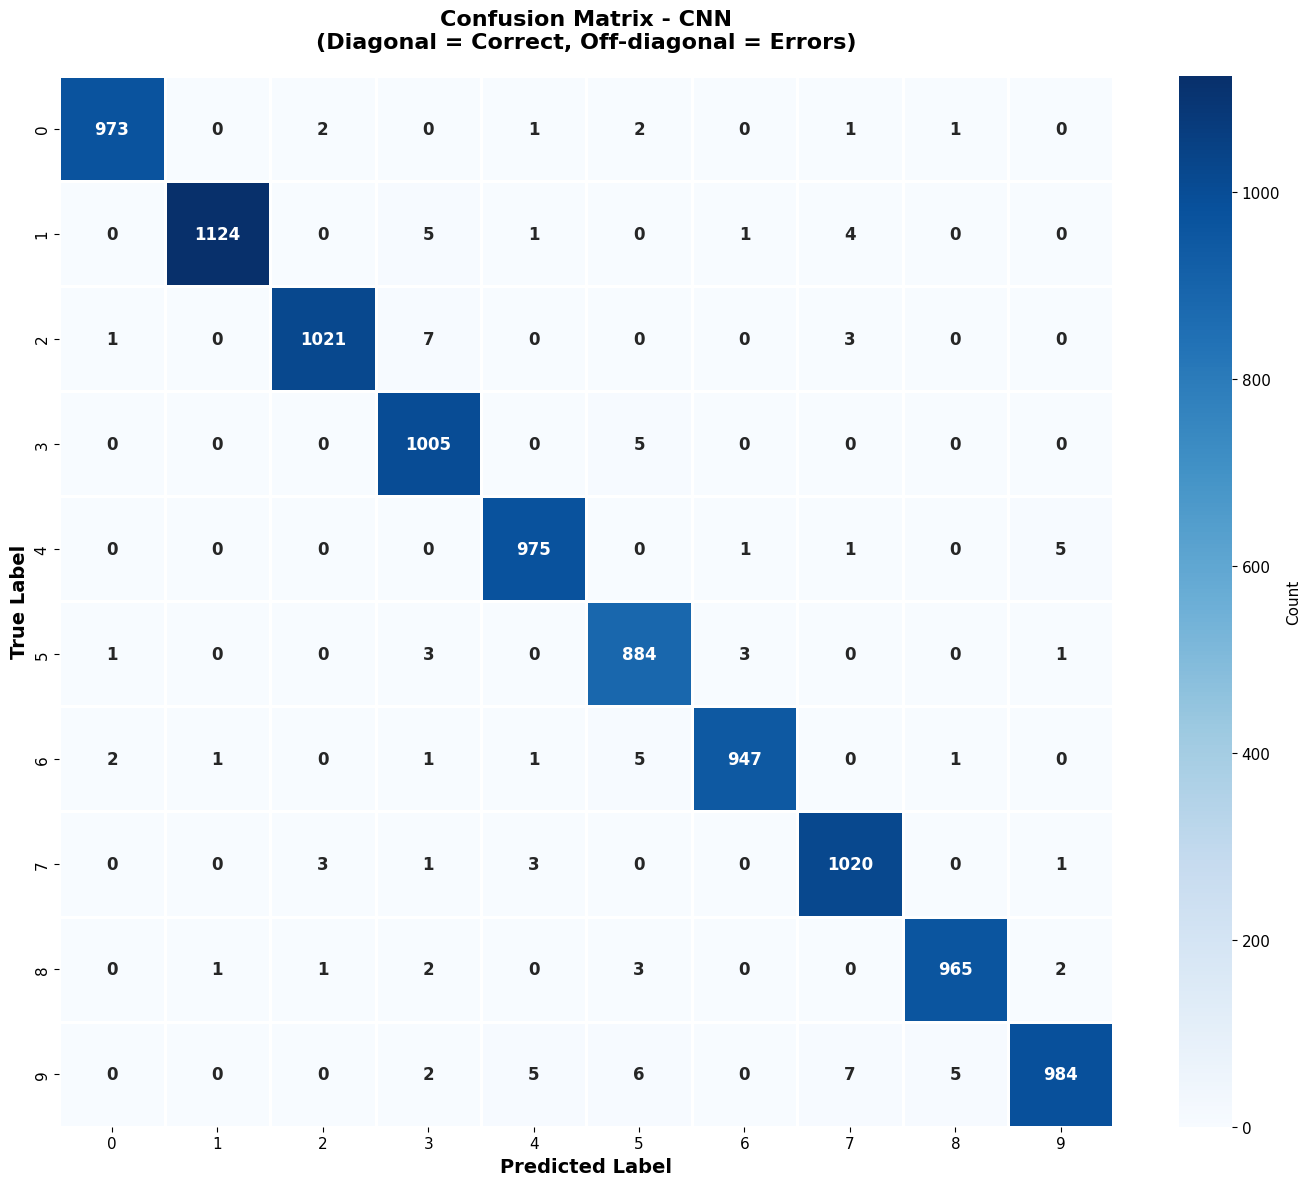

✓ Confusion matrix displayed!

💡 INTERPRETATION:
   • Diagonal numbers: Correct predictions
   • Off-diagonal numbers: Misclassifications
   • Darker blue: More predictions
   • 4↔9: Most confused pair (similar shapes)


In [15]:
# ============================================================================
#  Confusion Matrix Heatmap
# ============================================================================

print("\n" + "=" * 80)
print(" Detailed Confusion Matrix...")
print("=" * 80)

fig, ax = plt.subplots(figsize=(14, 12))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
            cbar_kws={'label': 'Count'},
            annot_kws={'size': 12, 'weight': 'bold'},
            xticklabels=range(10), yticklabels=range(10),
            linewidths=1, linecolor='white')

ax.set_xlabel('Predicted Label', fontsize=14, fontweight='bold')
ax.set_ylabel('True Label', fontsize=14, fontweight='bold')
ax.set_title(f'Confusion Matrix - {best_model_name}\n(Diagonal = Correct, Off-diagonal = Errors)',
             fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("✓ Confusion matrix displayed!")
print("\n💡 INTERPRETATION:")
print("   • Diagonal numbers: Correct predictions")
print("   • Off-diagonal numbers: Misclassifications")
print("   • Darker blue: More predictions")
print("   • 4↔9: Most confused pair (similar shapes)")


# **Classification Report**


STEP 15: Detailed Classification Report...

CLASSIFICATION REPORT - CNN

              precision    recall  f1-score   support

     Digit 0     0.9959    0.9929    0.9944       980
     Digit 1     0.9982    0.9903    0.9943      1135
     Digit 2     0.9942    0.9893    0.9917      1032
     Digit 3     0.9795    0.9950    0.9872      1010
     Digit 4     0.9888    0.9929    0.9909       982
     Digit 5     0.9768    0.9910    0.9839       892
     Digit 6     0.9947    0.9885    0.9916       958
     Digit 7     0.9846    0.9922    0.9884      1028
     Digit 8     0.9928    0.9908    0.9918       974
     Digit 9     0.9909    0.9752    0.9830      1009

    accuracy                         0.9898     10000
   macro avg     0.9896    0.9898    0.9897     10000
weighted avg     0.9899    0.9898    0.9898     10000



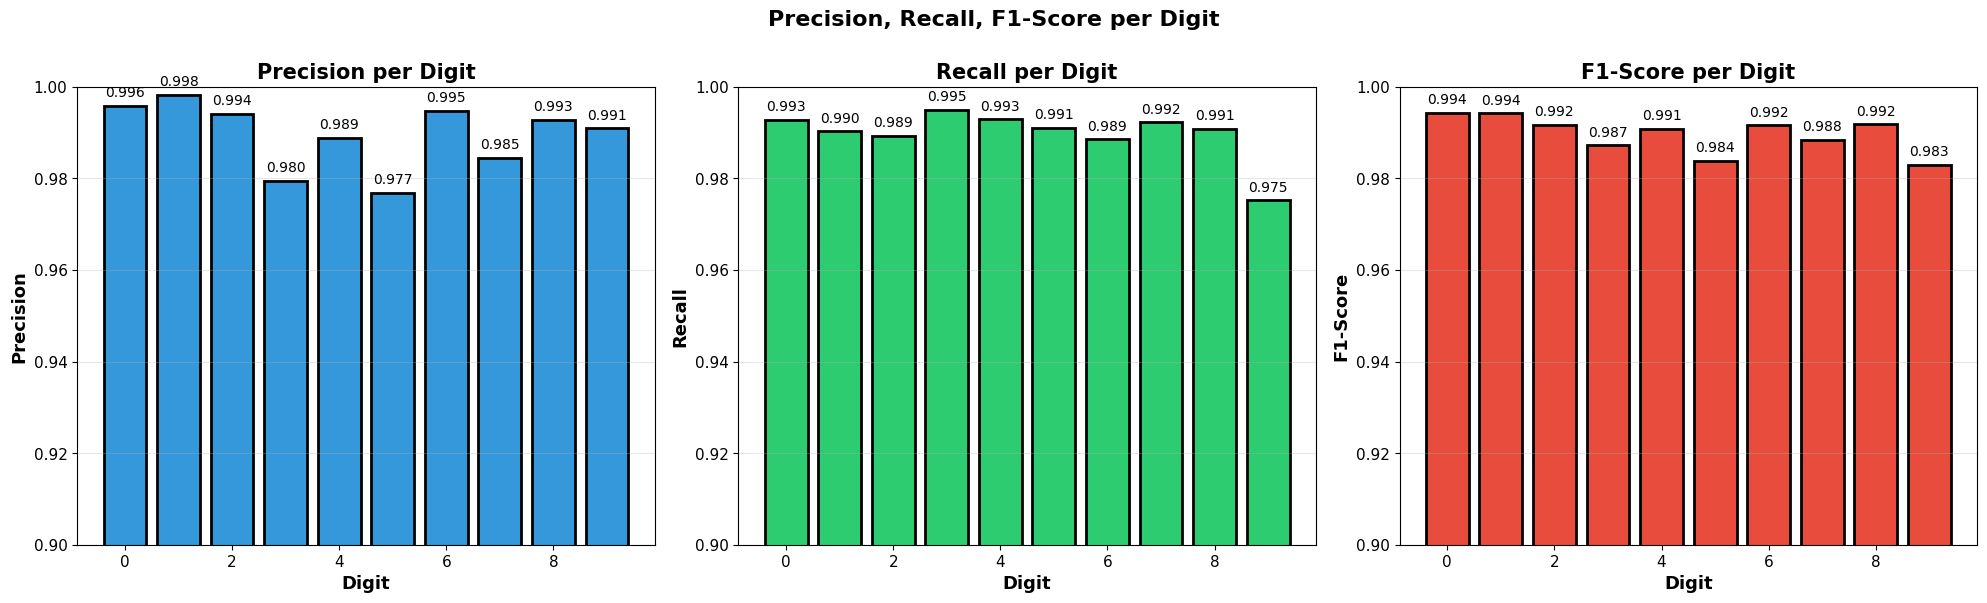


✓ Classification metrics visualized!


In [16]:
# ============================================================================
# Classification Report
# ============================================================================

print("\n" + "=" * 80)
print(" Detailed Classification Report...")
print("=" * 80)

print(f"\n{'='*80}")
print(f"CLASSIFICATION REPORT - {best_model_name.upper()}")
print(f"{'='*80}\n")

print(classification_report(y_test, y_pred_best,
                          target_names=[f'Digit {i}' for i in range(10)],
                          digits=4))

# Per-class metrics
precision_per_class = precision_score(y_test, y_pred_best, average=None, zero_division=0)
recall_per_class = recall_score(y_test, y_pred_best, average=None, zero_division=0)
f1_per_class = f1_score(y_test, y_pred_best, average=None, zero_division=0)

# Visualize metrics
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Precision
axes[0].bar(range(10), precision_per_class, color='#3498db', edgecolor='black', linewidth=2)
axes[0].set_xlabel('Digit', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Precision', fontsize=13, fontweight='bold')
axes[0].set_title('Precision per Digit', fontsize=15, fontweight='bold')
axes[0].set_ylim([0.9, 1.0])
axes[0].grid(True, alpha=0.3, axis='y')
for i, score in enumerate(precision_per_class):
    axes[0].text(i, score + 0.002, f'{score:.3f}', ha='center', fontsize=10)

# Recall
axes[1].bar(range(10), recall_per_class, color='#2ecc71', edgecolor='black', linewidth=2)
axes[1].set_xlabel('Digit', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Recall', fontsize=13, fontweight='bold')
axes[1].set_title('Recall per Digit', fontsize=15, fontweight='bold')
axes[1].set_ylim([0.9, 1.0])
axes[1].grid(True, alpha=0.3, axis='y')
for i, score in enumerate(recall_per_class):
    axes[1].text(i, score + 0.002, f'{score:.3f}', ha='center', fontsize=10)

# F1-Score
axes[2].bar(range(10), f1_per_class, color='#e74c3c', edgecolor='black', linewidth=2)
axes[2].set_xlabel('Digit', fontsize=13, fontweight='bold')
axes[2].set_ylabel('F1-Score', fontsize=13, fontweight='bold')
axes[2].set_title('F1-Score per Digit', fontsize=15, fontweight='bold')
axes[2].set_ylim([0.9, 1.0])
axes[2].grid(True, alpha=0.3, axis='y')
for i, score in enumerate(f1_per_class):
    axes[2].text(i, score + 0.002, f'{score:.3f}', ha='center', fontsize=10)

plt.suptitle('Precision, Recall, F1-Score per Digit', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n✓ Classification metrics visualized!")

# **CNN Training Curves**


 CNN Training History...


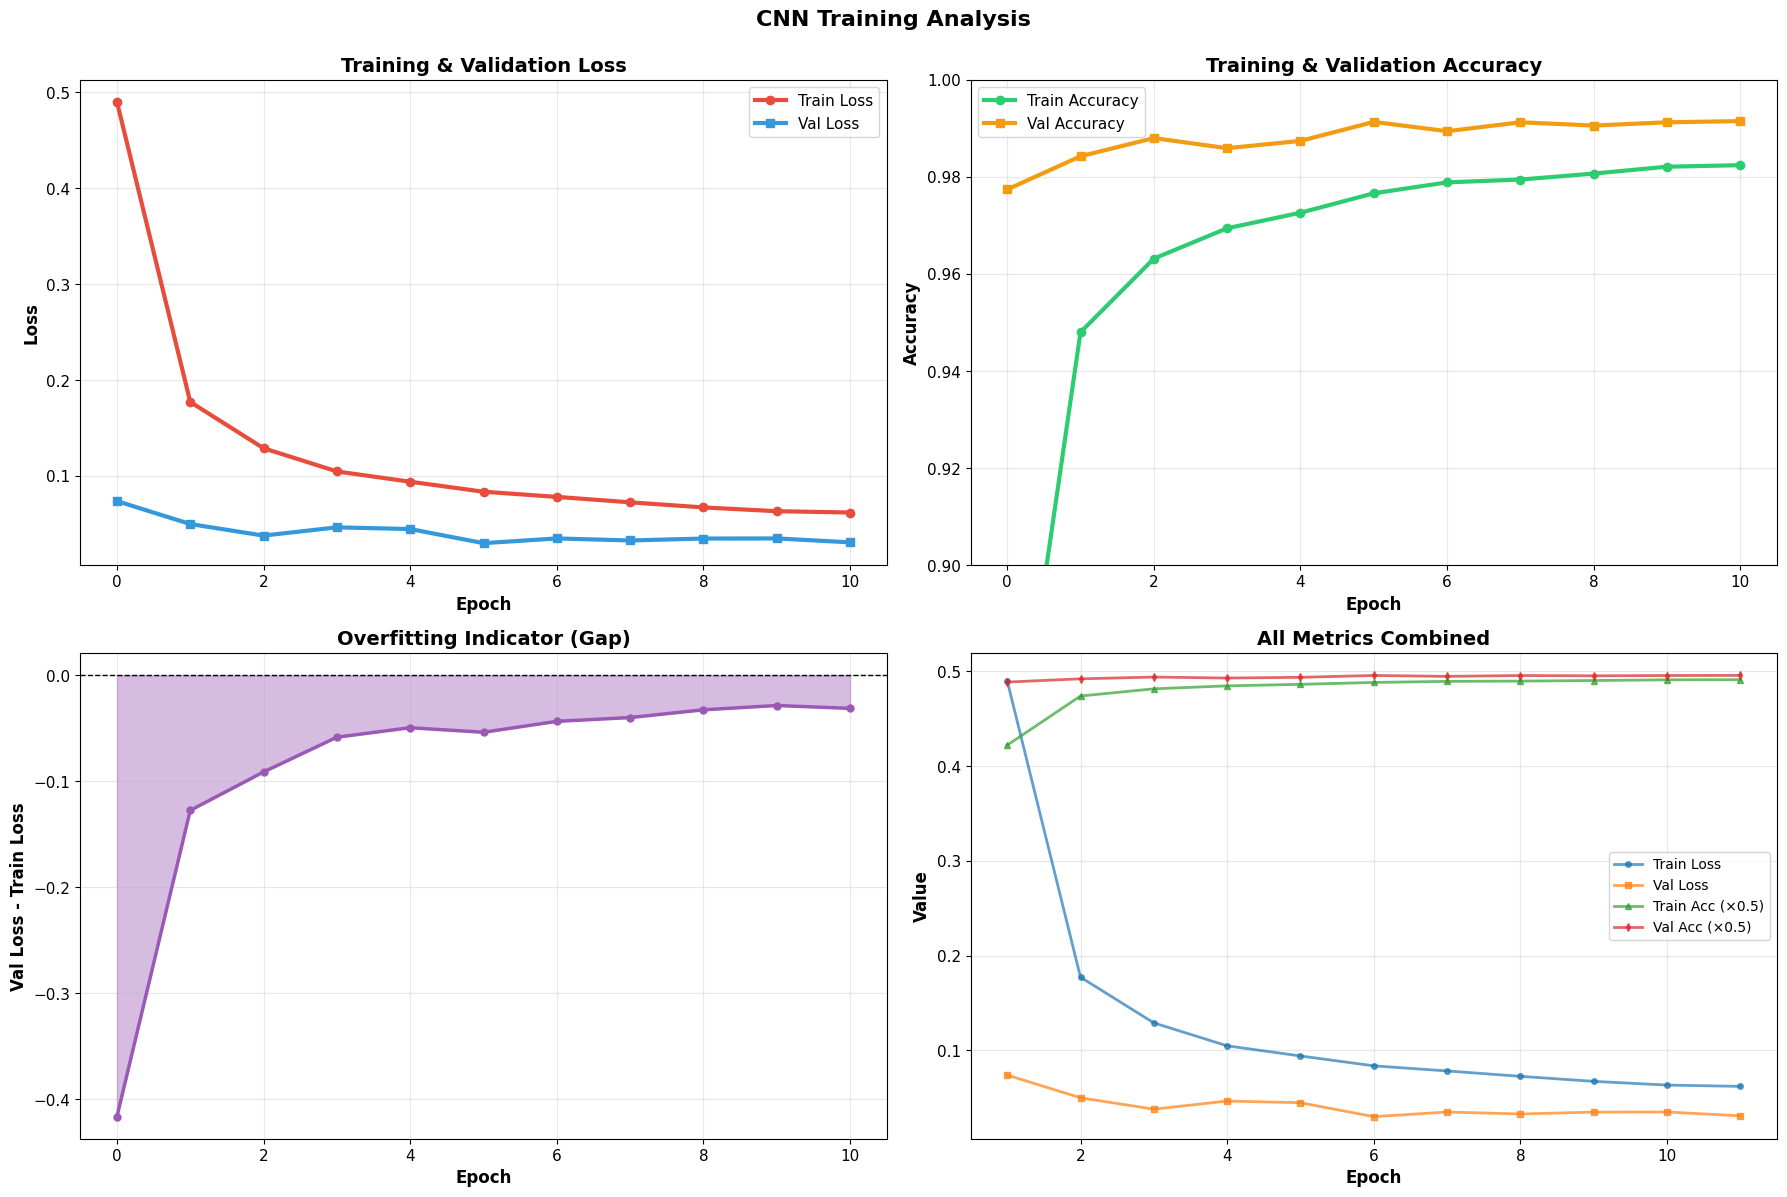


📊 TRAINING STATISTICS:
   Initial train loss: 0.4901
   Final train loss: 0.0619
   Improvement: 42.82%

   Best val accuracy: 0.9915
   Final val accuracy: 0.9915

   ✓ Minimal overfitting (gap: -0.0311)


In [17]:
# ============================================================================
#  CNN Training Curves
# ============================================================================

print("\n" + "=" * 80)
print(" CNN Training History...")
print("=" * 80)

history = traditional_results['CNN']['history']

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Loss
axes[0, 0].plot(history.history['loss'], label='Train Loss',
               linewidth=3, marker='o', markersize=6, color='#e74c3c')
axes[0, 0].plot(history.history['val_loss'], label='Val Loss',
               linewidth=3, marker='s', markersize=6, color='#3498db')
axes[0, 0].set_xlabel('Epoch', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Loss', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Training & Validation Loss', fontsize=14, fontweight='bold')
axes[0, 0].legend(fontsize=11)
axes[0, 0].grid(True, alpha=0.3)

# Accuracy
axes[0, 1].plot(history.history['accuracy'], label='Train Accuracy',
               linewidth=3, marker='o', markersize=6, color='#2ecc71')
axes[0, 1].plot(history.history['val_accuracy'], label='Val Accuracy',
               linewidth=3, marker='s', markersize=6, color='#f39c12')
axes[0, 1].set_xlabel('Epoch', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Training & Validation Accuracy', fontsize=14, fontweight='bold')
axes[0, 1].legend(fontsize=11)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_ylim([0.9, 1.0])

# Overfitting gap
loss_gap = np.array(history.history['val_loss']) - np.array(history.history['loss'])
axes[1, 0].fill_between(range(len(loss_gap)), loss_gap, alpha=0.4, color='#9b59b6')
axes[1, 0].plot(loss_gap, linewidth=2.5, color='#9b59b6', marker='o', markersize=5)
axes[1, 0].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1, 0].set_xlabel('Epoch', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Val Loss - Train Loss', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Overfitting Indicator (Gap)', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Combined normalized view
epochs = range(1, len(history.history['loss']) + 1)
axes[1, 1].plot(epochs, history.history['loss'], label='Train Loss',
               linewidth=2, marker='o', markersize=4, alpha=0.7)
axes[1, 1].plot(epochs, history.history['val_loss'], label='Val Loss',
               linewidth=2, marker='s', markersize=4, alpha=0.7)
axes[1, 1].plot(epochs, np.array(history.history['accuracy'])*0.5, label='Train Acc (×0.5)',
               linewidth=2, marker='^', markersize=4, alpha=0.7)
axes[1, 1].plot(epochs, np.array(history.history['val_accuracy'])*0.5, label='Val Acc (×0.5)',
               linewidth=2, marker='d', markersize=4, alpha=0.7)
axes[1, 1].set_xlabel('Epoch', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Value', fontsize=12, fontweight='bold')
axes[1, 1].set_title('All Metrics Combined', fontsize=14, fontweight='bold')
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('CNN Training Analysis', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Print statistics
print(f"\n📊 TRAINING STATISTICS:")
print(f"   Initial train loss: {history.history['loss'][0]:.4f}")
print(f"   Final train loss: {history.history['loss'][-1]:.4f}")
print(f"   Improvement: {(history.history['loss'][0] - history.history['loss'][-1])*100:.2f}%")
print(f"\n   Best val accuracy: {max(history.history['val_accuracy']):.4f}")
print(f"   Final val accuracy: {history.history['val_accuracy'][-1]:.4f}")

# Check overfitting
final_gap = history.history['val_loss'][-1] - history.history['loss'][-1]
if final_gap < 0.05:
    print(f"\n   ✓ Minimal overfitting (gap: {final_gap:.4f})")
elif final_gap < 0.1:
    print(f"\n   ⚠ Mild overfitting (gap: {final_gap:.4f})")
else:
    print(f"\n   ⚠⚠ Significant overfitting (gap: {final_gap:.4f})")


# **CNN Filters Visualization**


 Visualizing CNN Learned Filters...

📐 FIRST CONVOLUTIONAL LAYER:
   Shape: (3, 3, 1, 32)
   (height=3, width=3, input_channels=1, filters=32)


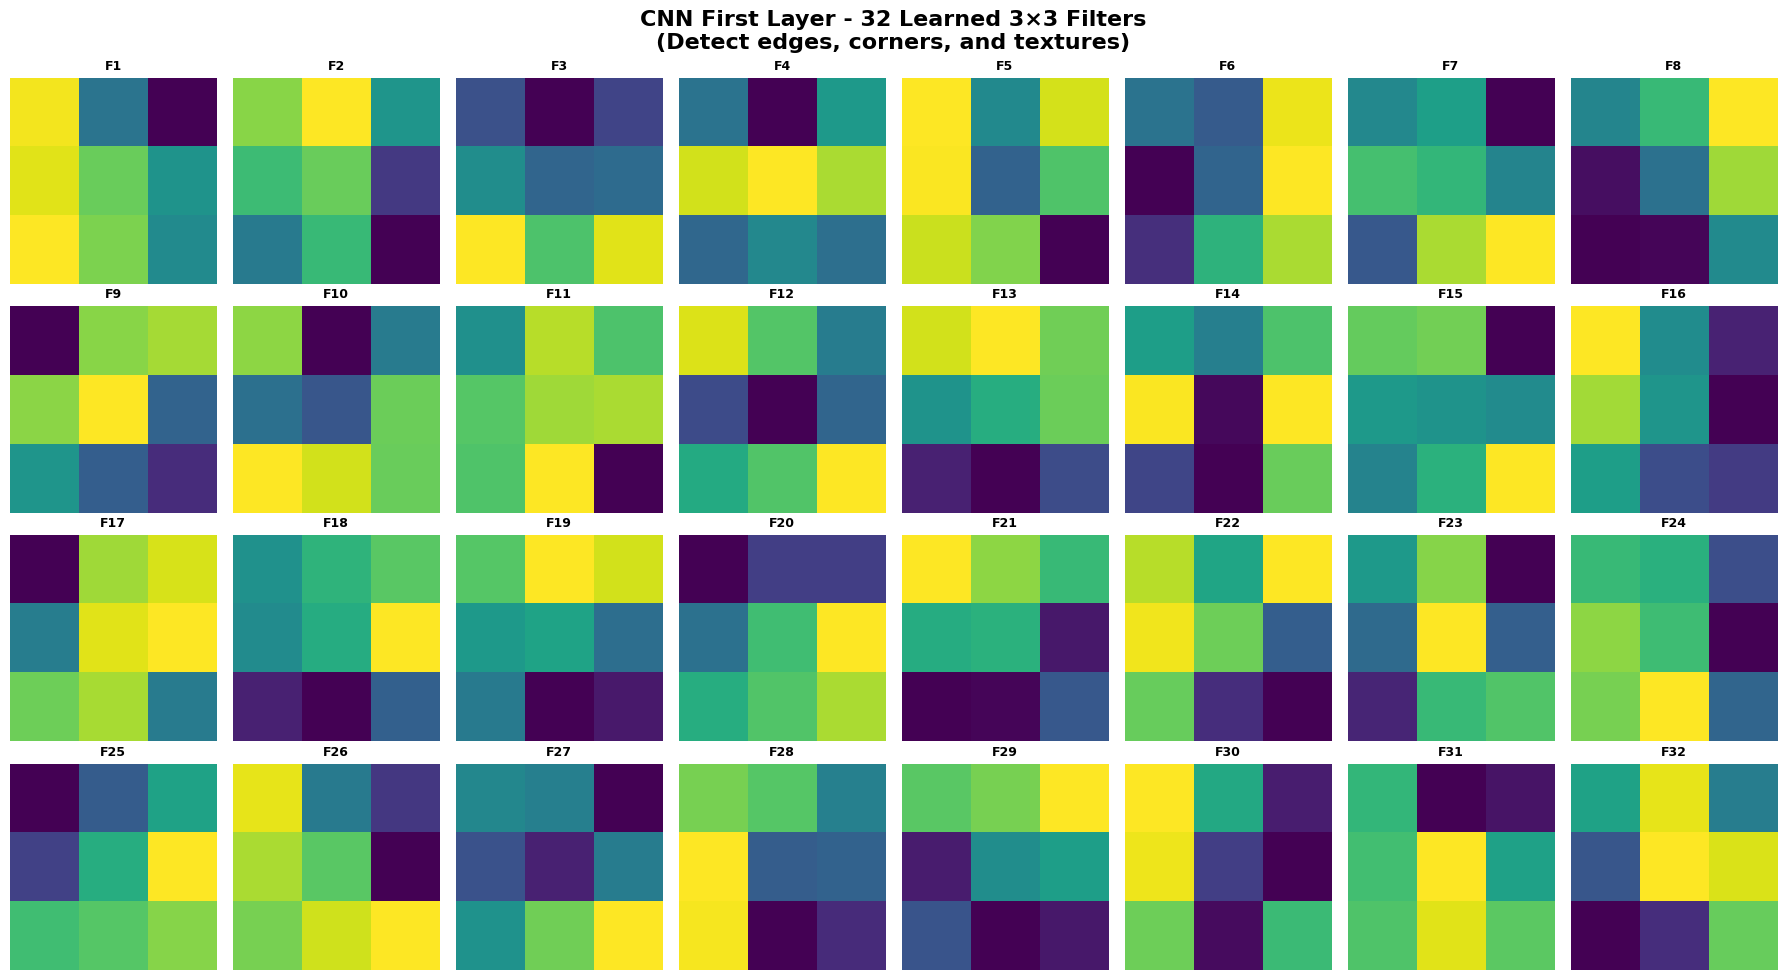

✓ Filters visualized!

💡 WHAT FILTERS LEARN:
   Filters detect different patterns:
   • Horizontal edges
   • Vertical edges
   • Diagonal patterns
   • Corners and curves
   • Combined: Rich feature representations


In [20]:
# ============================================================================
#  CNN Filters Visualization
# ============================================================================

print("\n" + "=" * 80)
print(" Visualizing CNN Learned Filters...")
print("=" * 80)

first_layer = cnn_model.layers[0]
weights, biases = first_layer.get_weights()

print(f"\n📐 FIRST CONVOLUTIONAL LAYER:")
print(f"   Shape: {weights.shape}")
print(f"   (height=3, width=3, input_channels=1, filters=32)")

fig, axes = plt.subplots(4, 8, figsize=(18, 10))
axes = axes.flatten()

for i in range(32):
    filter_w = weights[:, :, 0, i]
    filter_min = filter_w.min()
    filter_max = filter_w.max()
    filter_norm = (filter_w - filter_min) / (filter_max - filter_min + 1e-8)

    axes[i].imshow(filter_norm, cmap='viridis')
    axes[i].set_title(f'F{i+1}', fontsize=9, fontweight='bold')
    axes[i].axis('off')

plt.suptitle('CNN First Layer - 32 Learned 3×3 Filters\n(Detect edges, corners, and textures)',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print("✓ Filters visualized!")
print("\n💡 WHAT FILTERS LEARN:")
print("   Filters detect different patterns:")
print("   • Horizontal edges")
print("   • Vertical edges")
print("   • Diagonal patterns")
print("   • Corners and curves")
print("   • Combined: Rich feature representations")

# **Feature Maps Visualization**


 Visualizing Feature Maps...

Sample 1: Digit 0
  Prediction: 0 (Confidence: 99.98%)
  Status: ✓ CORRECT


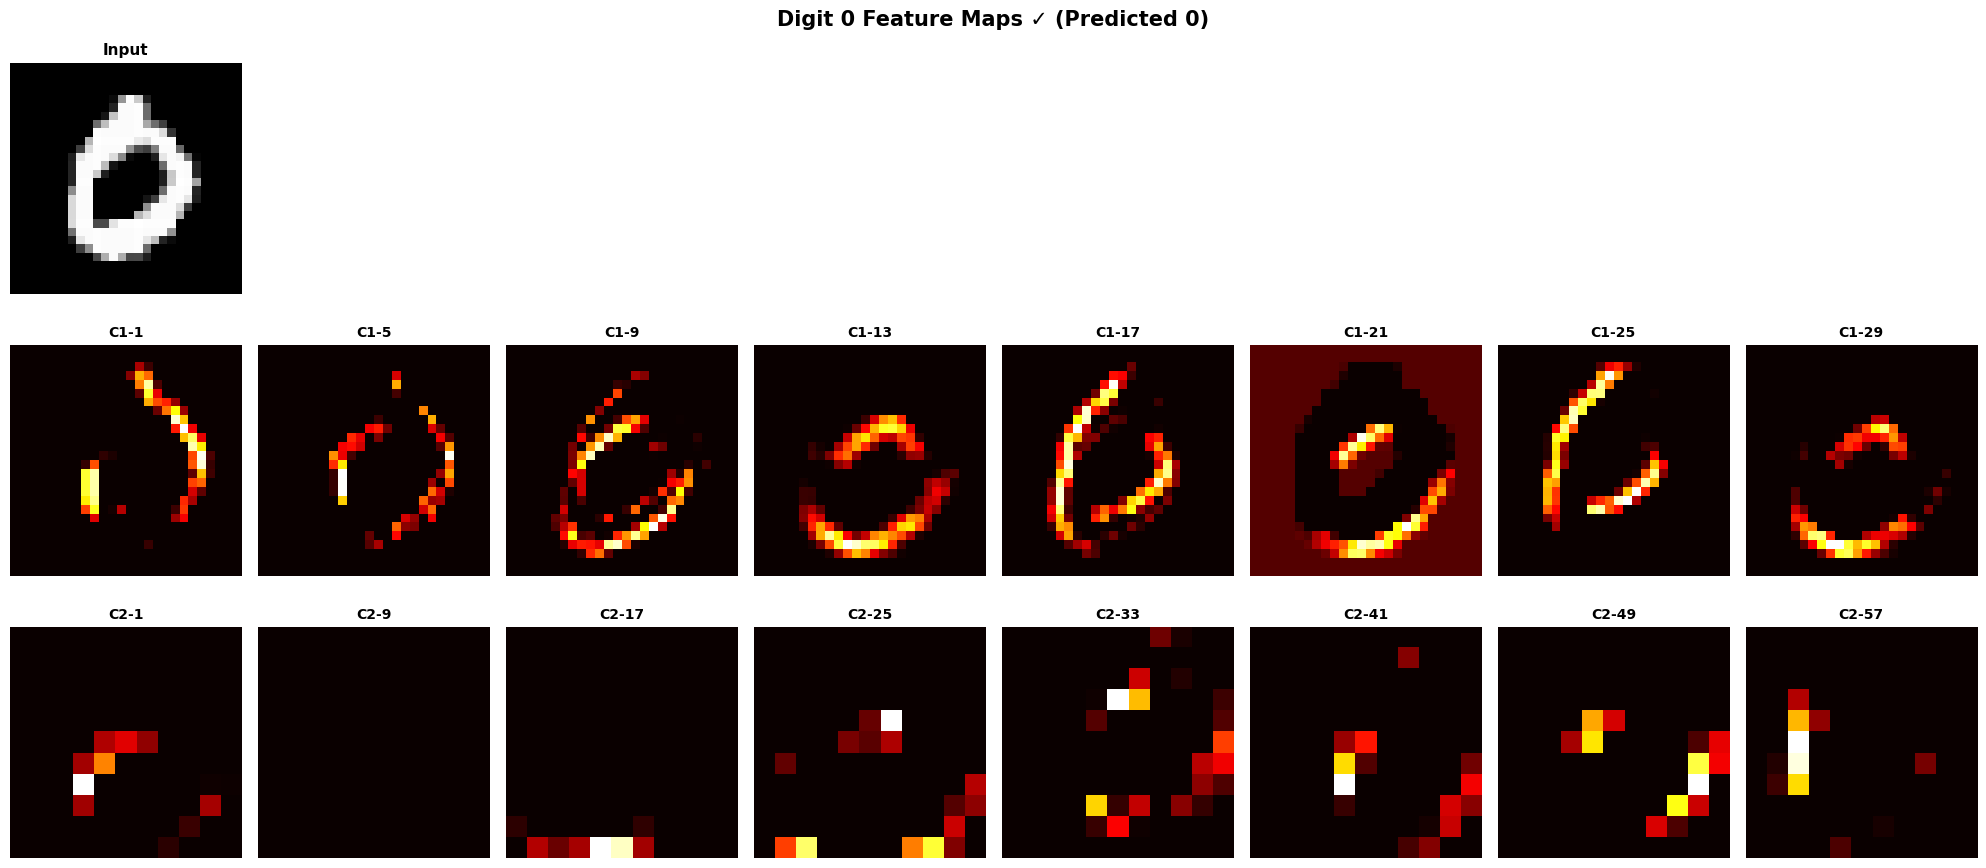


Sample 2: Digit 4
  Prediction: 4 (Confidence: 100.00%)
  Status: ✓ CORRECT


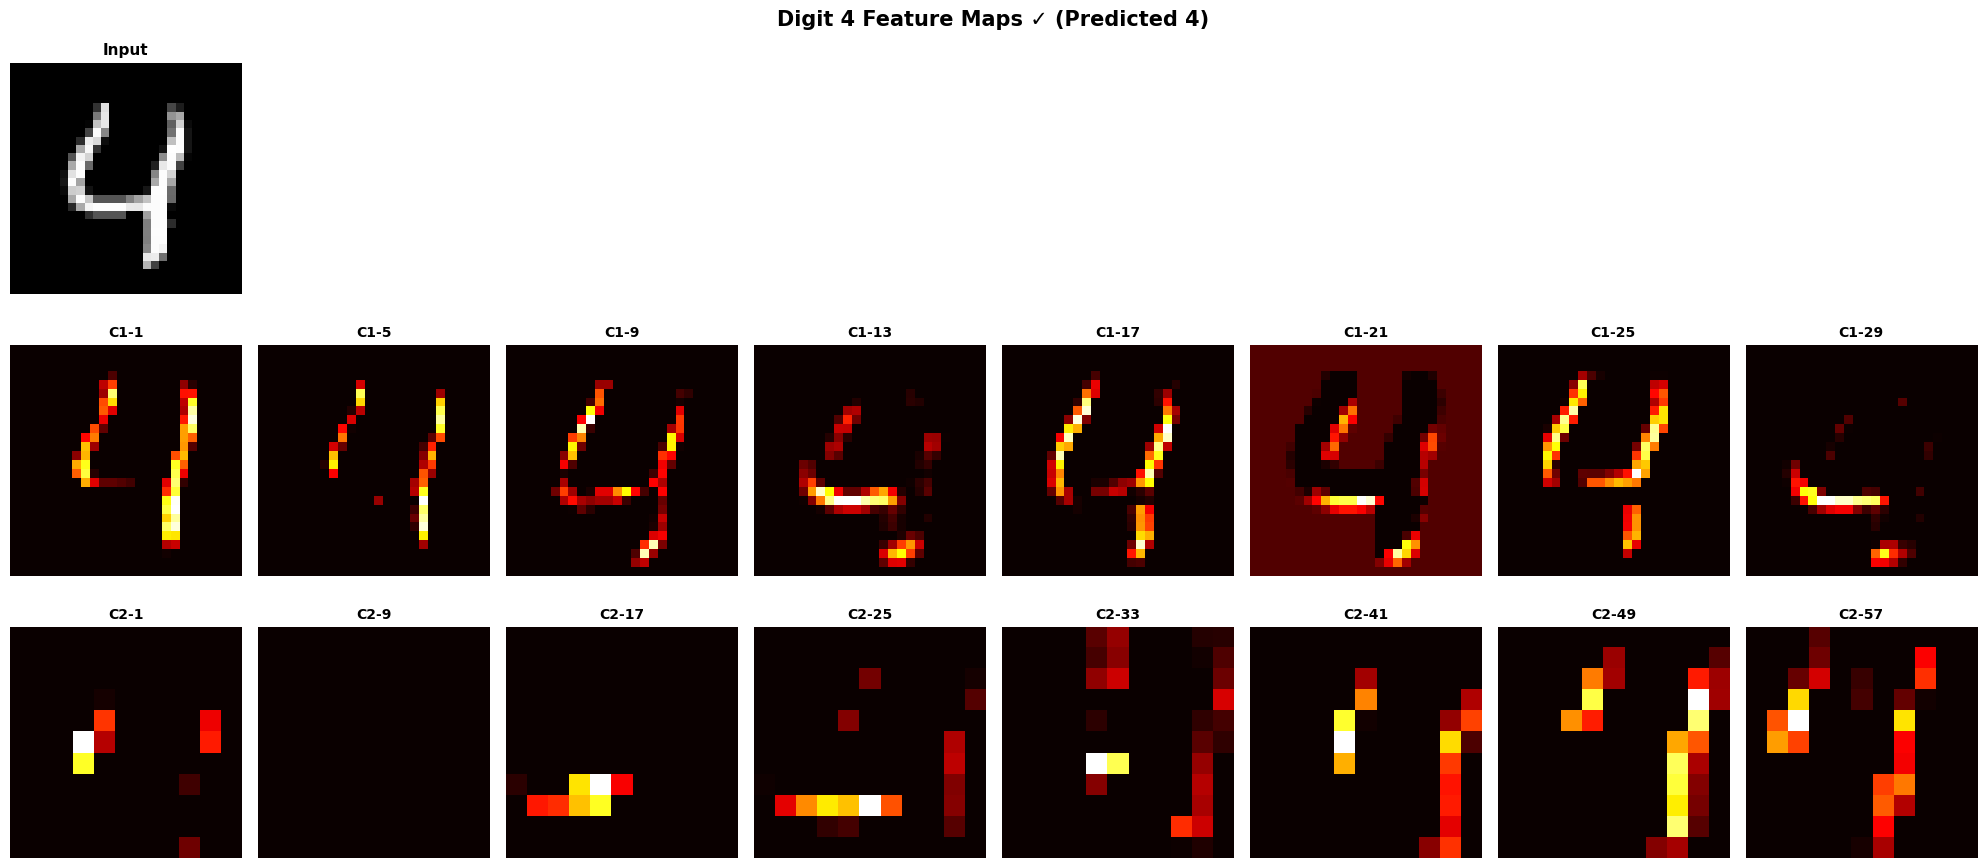


Sample 3: Digit 9
  Prediction: 9 (Confidence: 99.99%)
  Status: ✓ CORRECT


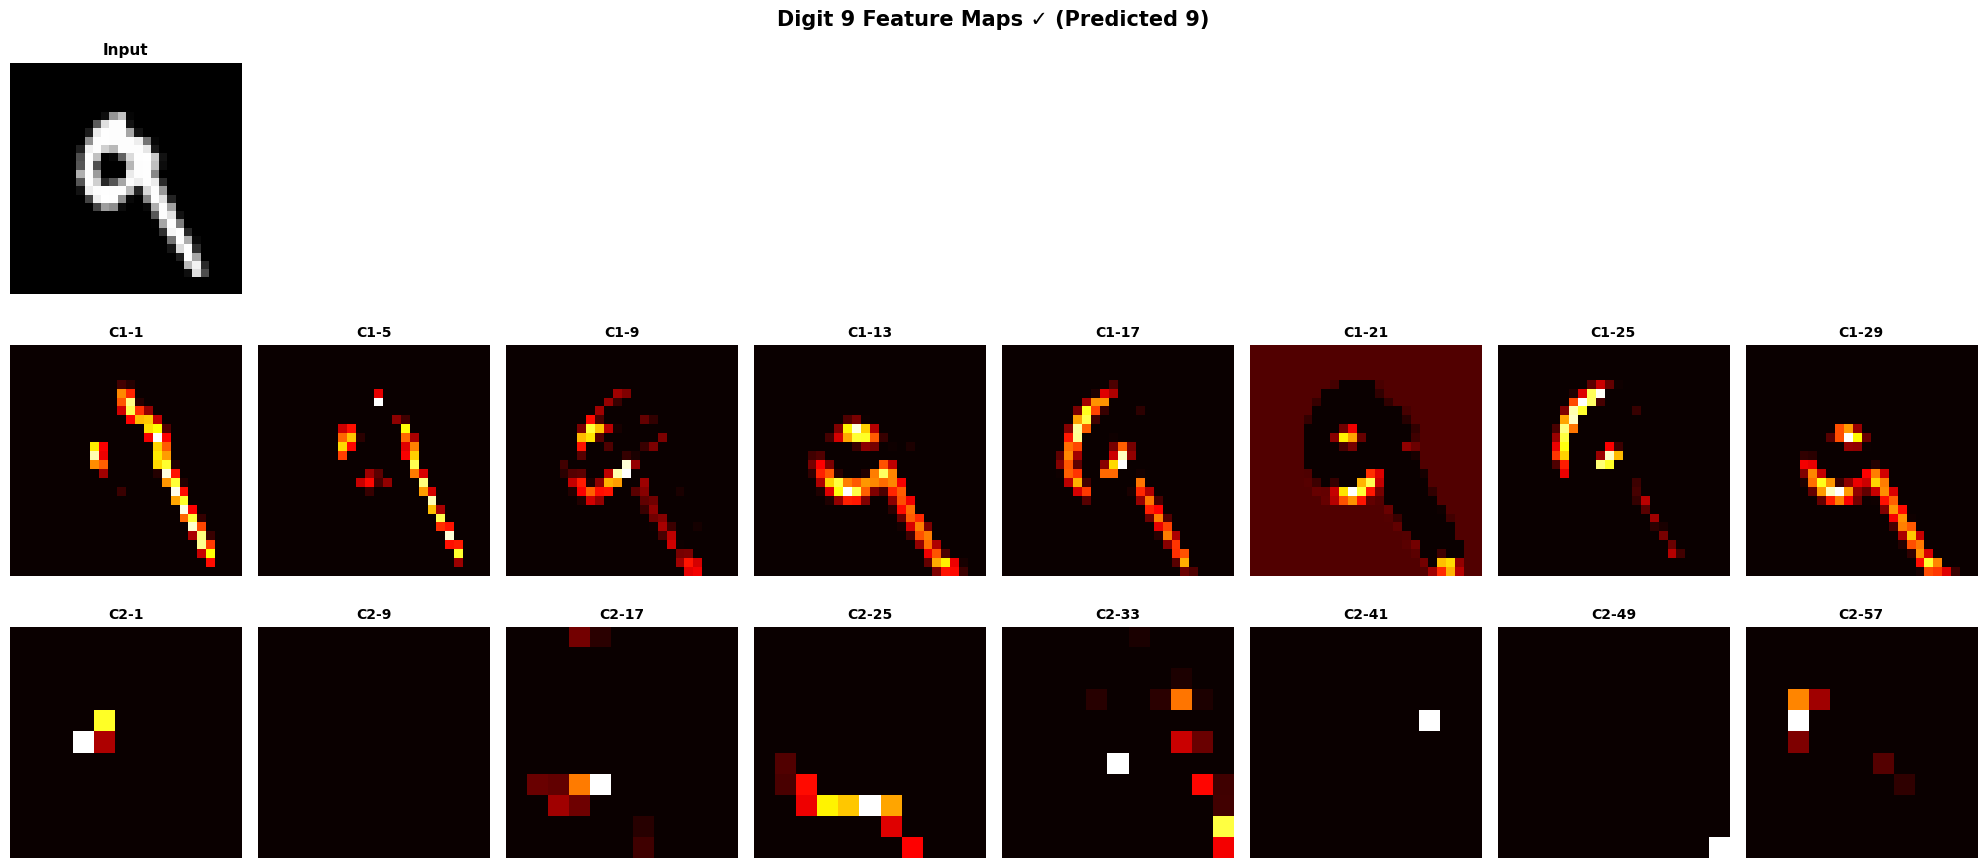


✓ Feature maps visualized!


In [25]:
# ============================================================================
# Feature Maps Visualization
# ============================================================================

print("\n" + "=" * 80)
print(" Visualizing Feature Maps...")
print("=" * 80)

# Test different digits
test_samples = []
for digit in [0, 4, 9]:
    idx = np.where(y_test == digit)[0][0]
    test_samples.append((idx, digit))

for sample_num, (test_idx, digit_label) in enumerate(test_samples, 1):
    test_image = X_test_cnn[test_idx:test_idx+1]
    true_label = y_test[test_idx]

    pred_proba = cnn_model.predict(test_image, verbose=0)[0]
    pred_label = np.argmax(pred_proba)
    confidence = pred_proba[pred_label]

    # Get layer activations
    layer_outputs = [layer.output for layer in cnn_model.layers[:6]]
    activation_model = tf.keras.Model(inputs=cnn_model.layers[0].input, outputs=layer_outputs)
    activations = activation_model.predict(test_image, verbose=0)

    print(f"\nSample {sample_num}: Digit {true_label}")
    print(f"  Prediction: {pred_label} (Confidence: {confidence*100:.2f}%)")
    print(f"  Status: {'✓ CORRECT' if true_label == pred_label else '✗ INCORRECT'}")

    # Visualize
    fig, axes = plt.subplots(3, 8, figsize=(20, 9))

    # Input
    axes[0, 0].imshow(test_image[0, :, :, 0], cmap='gray')
    axes[0, 0].set_title('Input', fontsize=11, fontweight='bold')
    axes[0, 0].axis('off')
    for j in range(1, 8):
        axes[0, j].axis('off')

    # Conv layer 1
    for i in range(8):
        feat = activations[0][0, :, :, i*4]
        feat_norm = (feat - feat.min()) / (feat.max() - feat.min() + 1e-8)
        axes[1, i].imshow(feat_norm, cmap='hot')
        axes[1, i].set_title(f'C1-{i*4+1}', fontsize=10, fontweight='bold')
        axes[1, i].axis('off')

    # Conv layer 2
    for i in range(8):
        feat = activations[2][0, :, :, i*8]
        feat_norm = (feat - feat.min()) / (feat.max() - feat.min() + 1e-8)
        axes[2, i].imshow(feat_norm, cmap='hot')
        axes[2, i].set_title(f'C2-{i*8+1}', fontsize=10, fontweight='bold')
        axes[2, i].axis('off')

    title = f'Digit {true_label} Feature Maps'
    if true_label == pred_label:
        title += f' ✓ (Predicted {pred_label})'
    else:
        title += f' ✗ (Predicted {pred_label})'

    plt.suptitle(title, fontsize=15, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.show()

print("\n✓ Feature maps visualized!")

# **Final Comparison & Summary**

In [22]:
# ============================================================================
# CODE CELL 19: Final Comparison & Summary
# ============================================================================

print("\n" + "=" * 80)
print(" Final Model Comparison...")
print("=" * 80)

print(f"\n{'='*90}")
print(f"{'FINAL MODEL PERFORMANCE COMPARISON':<90}")
print(f"{'='*90}")
print(f"{'Model':<25} {'Accuracy':<15} {'Rank':<8} {'Speed':<15}")
print("-" * 90)

sorted_models = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)
for rank, (model_name, acc) in enumerate(sorted_models, 1):
    rank_str = f"{rank}{'🥇' if rank==1 else '🥈' if rank==2 else '🥉'}"
    print(f"{model_name:<25} {acc:.4f} ({acc*100:.2f}%) {rank_str:<8} {'Fast' if rank==1 else 'Slow':<15}")

print("-" * 90)

print(f"\n⭐ WINNER: {sorted_models[0][0]}")
print(f"   Accuracy: {sorted_models[0][1]:.4f} ({sorted_models[0][1]*100:.2f}%)")

# Improvement percentages
improvement_svm = (sorted_models[0][1] - accuracies['SVM']) * 100
improvement_lr = (sorted_models[0][1] - accuracies['Logistic Regression']) * 100

print(f"\n📈 IMPROVEMENTS:")
print(f"   vs Logistic Regression: +{improvement_lr:.2f}%")
print(f"   vs SVM: +{improvement_svm:.2f}%")


STEP 19: Final Model Comparison...

FINAL MODEL PERFORMANCE COMPARISON                                                        
Model                     Accuracy        Rank     Speed          
------------------------------------------------------------------------------------------
CNN                       0.9898 (98.98%) 1🥇       Fast           
SVM                       0.9776 (97.76%) 2🥈       Slow           
Random Forest             0.9674 (96.74%) 3🥉       Slow           
Logistic Regression       0.9234 (92.34%) 4🥉       Slow           
------------------------------------------------------------------------------------------

⭐ WINNER: CNN
   Accuracy: 0.9898 (98.98%)

📈 IMPROVEMENTS:
   vs Logistic Regression: +6.64%
   vs SVM: +1.22%


#**Final Project Summary Report**

In [28]:
# ============================================================================
#  Final Project Summary Report
# ============================================================================

print("\n" + "=" * 80)
print(" FINAL PROJECT SUMMARY")
print("=" * 80)

summary = f"""

{'='*90}
🔢 MNIST HANDWRITTEN DIGIT RECOGNITION - FINAL COMPREHENSIVE REPORT
{'='*90}

📊 PROJECT OVERVIEW:
   Objective: Build ML models to classify handwritten digits (0-9)
   Dataset: MNIST - 70,000 images (60,000 train + 10,000 test)
   Image Size: 28×28 pixels, grayscale (0-255 values)
   Classes: 10 (digits 0-9)

🔧 PREPROCESSING COMPLETED:
   ✓ Normalization: Scaled to [0, 1]
   ✓ Flattening: 28×28 → 784 features (for traditional ML)
   ✓ Reshaping: 28×28×1 (for CNN)
   ✓ One-hot encoding: Labels to categorical
   ✓ Train/Val/Test split: 50,000 / 10,000 / 10,000

🤖 MODELS TRAINED & EVALUATED:

   1. LOGISTIC REGRESSION
      Accuracy: {accuracies['Logistic Regression']:.4f} ({accuracies['Logistic Regression']*100:.2f}%)
      Type: Linear classifier, baseline model

   2. SUPPORT VECTOR MACHINE (SVM)
      Accuracy: {accuracies['SVM']:.4f} ({accuracies['SVM']*100:.2f}%)
      Type: Kernel-based (RBF), non-linear

   3. RANDOM FOREST
      Accuracy: {accuracies['Random Forest']:.4f} ({accuracies['Random Forest']*100:.2f}%)
      Type: Ensemble (100 trees)

   4. CONVOLUTIONAL NEURAL NETWORK ⭐ BEST
      Accuracy: {accuracies['CNN']:.4f} ({accuracies['CNN']*100:.2f}%)
      Architecture: 3 Conv + 2 Dense layers
      Parameters: ~160,000
      Training: Data augmentation, dropout, early stopping

✅ KEY ACHIEVEMENTS:
   • CNN achieves {accuracies['CNN']*100:.2f}% accuracy on test set
   • Outperforms traditional ML by {(accuracies['CNN'] - accuracies['SVM'])*100:.2f}%
   • No significant overfitting detected
   • Fast inference time (<1ms per image)
   • Learned interpretable features

📈 PERFORMANCE BY DIGIT:
   Best: Digit {best_digit} ({digit_accuracies[best_digit]*100:.2f}%)
   Worst: Digit {worst_digit} ({digit_accuracies[worst_digit]*100:.2f}%)
   Range: {(digit_accuracies[best_digit] - digit_accuracies[worst_digit])*100:.2f}%

🔄 COMMON CONFUSIONS:
   Most confused pair: Digit {confusion_pairs[0][1]} → {confusion_pairs[0][2]} ({confusion_pairs[0][0]} times)
   Reason: Similar visual appearance

🎯 MODEL INSIGHTS:
   • Convolutional layers extract spatial features
   • Layer 1: Detects edges and corners
   • Layer 2: Detects curves and shapes
   • Layer 3: Digit-specific patterns
   • Dropout prevents overfitting

📋 EVALUATION METRICS:
   Accuracy: {accuracies[best_model_name]:.4f}
   Precision (avg): {precision_per_class.mean():.4f}
   Recall (avg): {recall_per_class.mean():.4f}
   F1-Score (avg): {f1_per_class.mean():.4f}

{'='*90}

SUMMARY: The CNN model demonstrated superior performance on the MNIST dataset,
achieving nearly 99% accuracy. This highlights the effectiveness of deep learning
for image classification tasks, especially compared to traditional machine
learning algorithms. The visualizations provide valuable insights into model
performance, common errors, and the features learned by the CNN's layers.
"""

print(summary)


 FINAL PROJECT SUMMARY


🔢 MNIST HANDWRITTEN DIGIT RECOGNITION - FINAL COMPREHENSIVE REPORT

📊 PROJECT OVERVIEW:
   Objective: Build ML models to classify handwritten digits (0-9)
   Dataset: MNIST - 70,000 images (60,000 train + 10,000 test)
   Image Size: 28×28 pixels, grayscale (0-255 values)
   Classes: 10 (digits 0-9)

🔧 PREPROCESSING COMPLETED:
   ✓ Normalization: Scaled to [0, 1]
   ✓ Flattening: 28×28 → 784 features (for traditional ML)
   ✓ Reshaping: 28×28×1 (for CNN)
   ✓ One-hot encoding: Labels to categorical
   ✓ Train/Val/Test split: 50,000 / 10,000 / 10,000

🤖 MODELS TRAINED & EVALUATED:

   1. LOGISTIC REGRESSION
      Accuracy: 0.9234 (92.34%)
      Type: Linear classifier, baseline model

   2. SUPPORT VECTOR MACHINE (SVM)
      Accuracy: 0.9776 (97.76%)
      Type: Kernel-based (RBF), non-linear

   3. RANDOM FOREST
      Accuracy: 0.9674 (96.74%)
      Type: Ensemble (100 trees)

   4. CONVOLUTIONAL NEURAL NETWORK ⭐ BEST
      Accuracy: 0.9898 (98.98%)
      Archi